In [53]:
import os

folder_path = os.path.expanduser(r'C:/Users/fabio/OneDrive/Desktop/Fabio Honors 2024/SEMESTER 2/INF 791/CLEANED/Game_Analytics_Dataset.csv')

# Check if the folder exists
if os.path.exists(folder_path):
    print(f"Folder exists: {folder_path}")
else:
    print(f"Folder not found: {folder_path}")

Folder not found: C:/Users/fabio/OneDrive/Desktop/Fabio Honors 2024/SEMESTER 2/INF 791/CLEANED/Game_Analytics_Dataset.csv


Add the imports,
Define the folder to your desktop,
Create a combined DataFrame,
Display the combined DataFrame,
Save the combined DataFrame

In [54]:
import os
import pandas as pd

# Define the path to the folder on your desktop
folder_path = os.path.expanduser(r'C:\Users\fabio\Downloads\INF791')

# List to store individual DataFrames
dfs = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file and append it to the list
        df = pd.read_csv(file_path)
        dfs.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
combined_df.head()

# Optionally, save the combined DataFrame to a new CSV file
combined_df.to_csv(os.path.join(folder_path, 'combined_csv_output.csv'), index=False)

print(f"Combined CSV saved to {os.path.join(folder_path, 'combined_csv_output.csv')}")


Combined CSV saved to C:\Users\fabio\Downloads\INF791\combined_csv_output.csv


Add the necessary imports

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Phase 1: Data Collection

pd.set_option("expand_frame_repr", False)
df= pd.read_csv("Game_Analytics_Dataset.csv", delimiter=';')


In [56]:
#Data Cleaning


Data Preperation

In [57]:
# Drop all the duplicates
df2 = df.drop_duplicates()

# --- Remove negative values from time feature --- #

df2['Time_in_seconds'] = pd.to_numeric(df2['Time_in_seconds'], errors='coerce')
df2 = df2.dropna(subset=['Time_in_seconds'])
df2['Time_in_seconds'] = df2['Time_in_seconds'] 

print(df2.head())


    Nickname  Defender_Score  Attacker_Score  Time_in_seconds    Winner   Level
0  u20444550             8.0             5.0            138.0  Defender  Expert
1  u20444550             8.0             5.0            137.0  Defender  Expert
2  u20444550            10.0             3.0            118.0  Defender  Expert
3  u20444550             8.0             5.0            112.0  Defender  Expert
4  u20444550             9.0             4.0            107.0  Defender  Expert


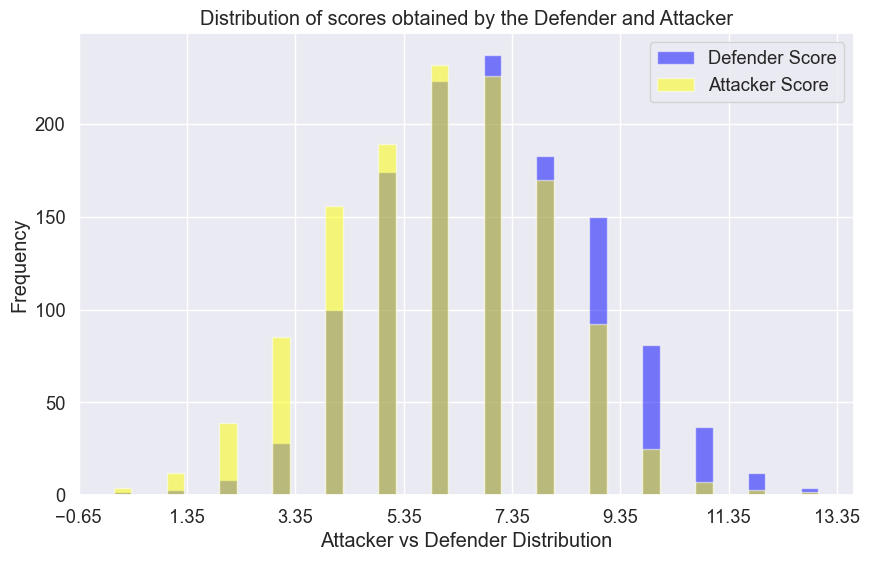

In [58]:
# df2['Defender_Score'] = np.log(df2['Defender_Score']+1)

#--PLOTING TRANSFORMED DATA--#

# df2['Defender_Score'] = np.log(df2['Defender_Score']+1)


# df2['USD'] = np.sqrt(df2['USD'])

# df2['BTC'], _ = stats.yeojohnson(df2['BTC'])



fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df2['Defender_Score'], bins=40, alpha=0.5, color='blue', label='Defender Score')
ax.hist(df2['Attacker_Score'], bins=40, alpha=0.5, color='yellow', label='Attacker Score')


# Add labels and a legend
ax.set_xlabel('Attacker vs Defender Distribution')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of scores obtained by the Defender and Attacker')
ax.legend()

# Set x-axis ticks to increment by 2
start, end = ax.get_xlim()
ax.set_xticks(np.arange(start, end, 2))

ax.legend()

# Show the plot
plt.show()





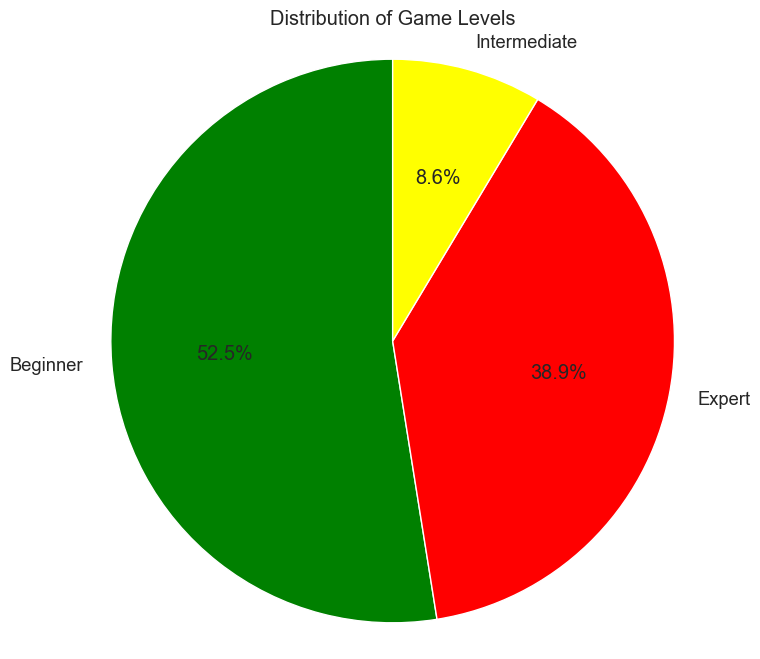

In [59]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Cleaned_Game_Analytics_Dataset.csv')

# Count the occurrences of each level
level_counts = df['Level'].value_counts()

# Define colors for each level (Beginner = Green, Intermediate = Yellow, Expert = Red)
colors = {
    'Beginner': 'green',
    'Intermediate': 'yellow',
    'Expert': 'red'
}

# Assign colors based on the levels
level_colors = [colors[level] for level in level_counts.index]

# Plot a pie chart for the levels with custom colors
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=level_colors)
plt.title('Distribution of Game Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


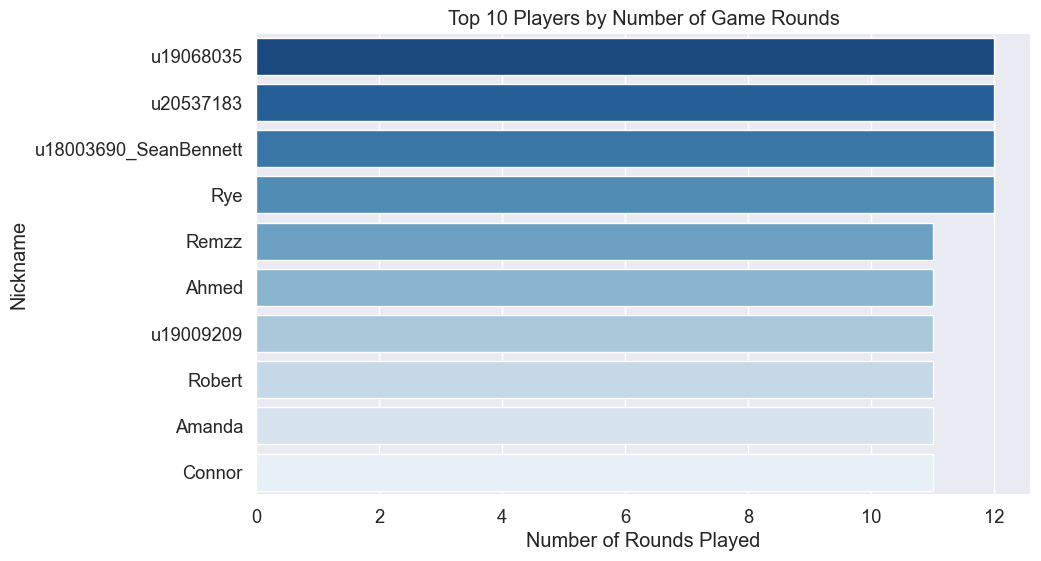

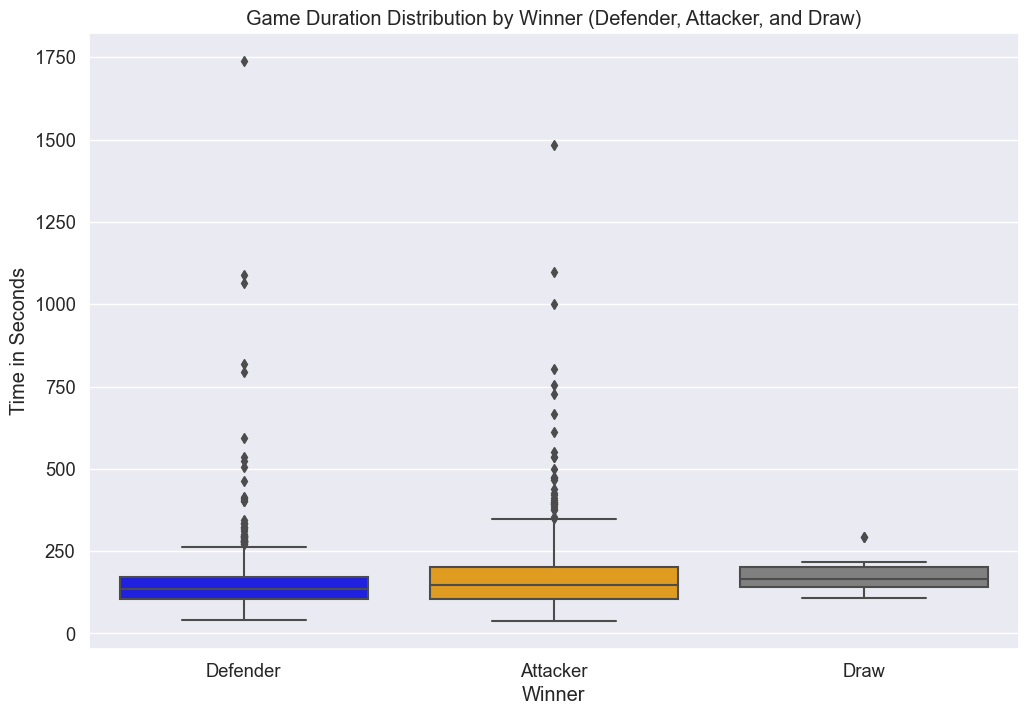

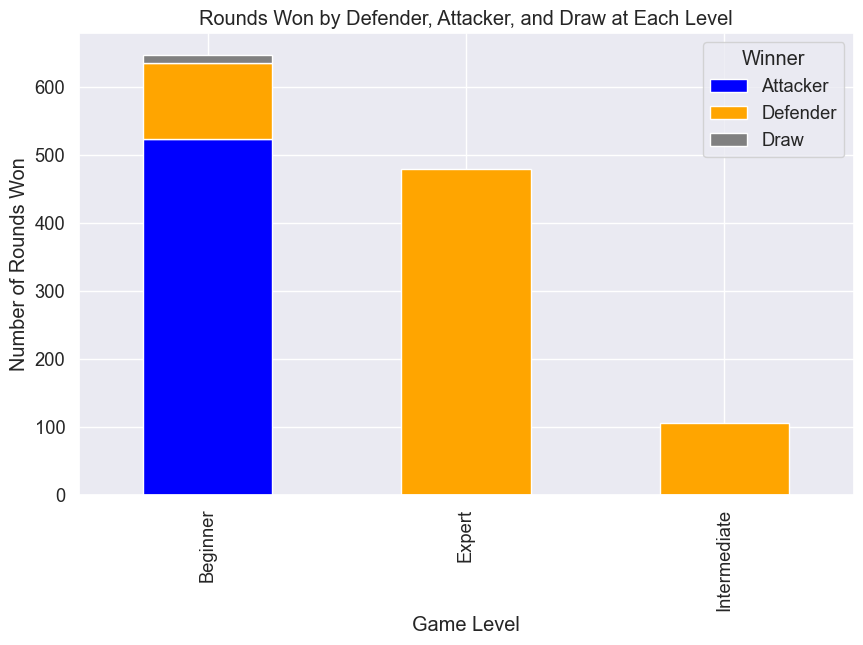

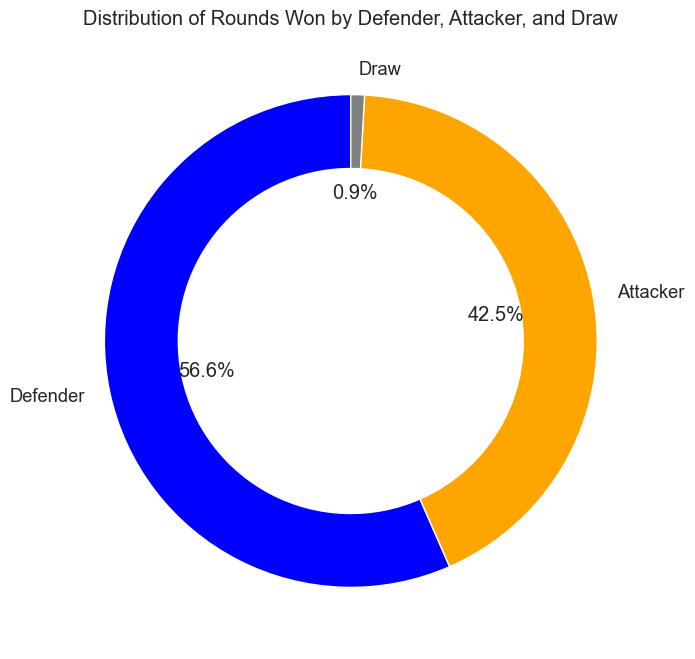

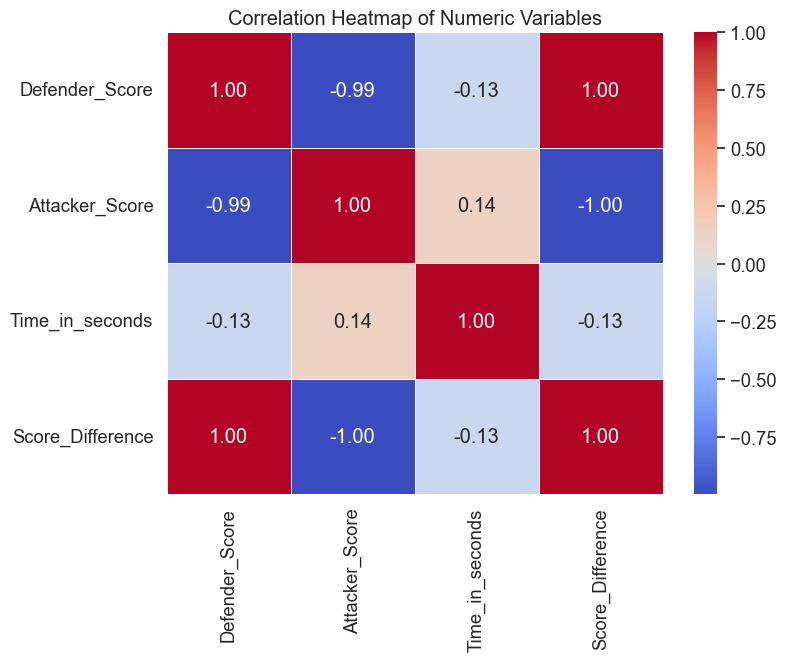

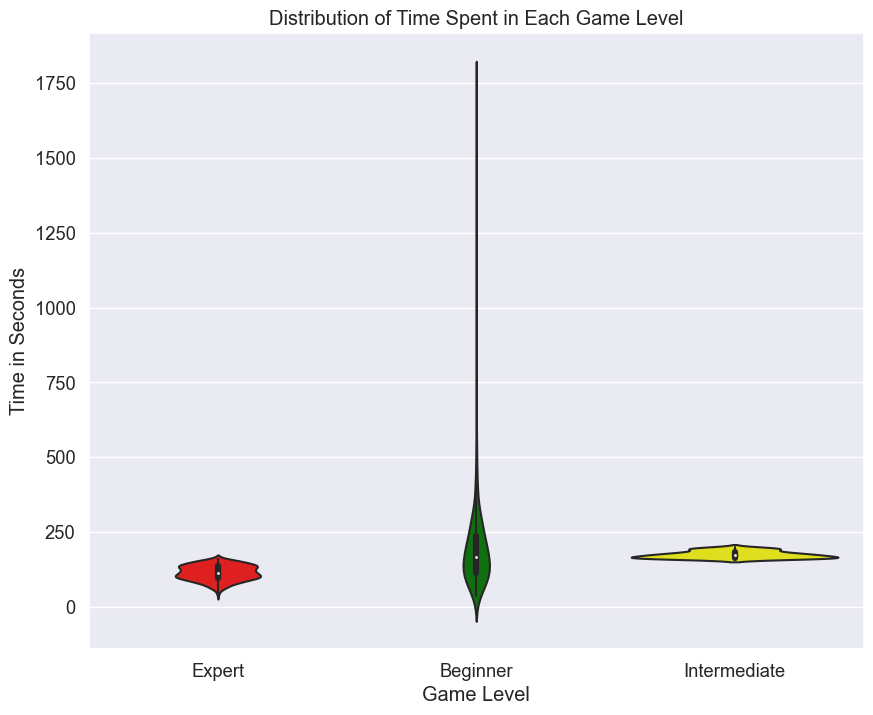

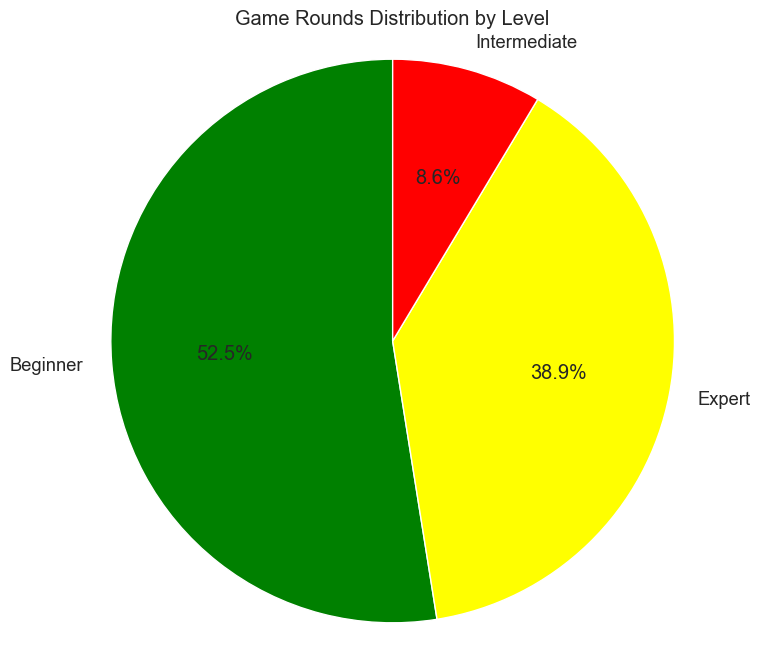

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Cleaned_Game_Analytics_Dataset.csv')

# ------------------- Horizontal Bar Plot for Nicknames (Top 10 Players) -------------------

# Count the number of occurrences for each Nickname
nickname_counts = df['Nickname'].value_counts().head(10)  # Show top 10 players

# Create a horizontal bar plot for top players by nickname (using a blue color palette)
plt.figure(figsize=(10, 6))
sns.barplot(y=nickname_counts.index, x=nickname_counts.values, palette='Blues_r', orient='h')
plt.title('Top 10 Players by Number of Game Rounds')
plt.xlabel('Number of Rounds Played')
plt.ylabel('Nickname')
plt.show()

# ------------------- Box Plot for Rounds Won by Defender, Attacker, and Draw -------------------

# Box plots show the distribution and highlight any outliers (Defender = blue, Attacker = orange, Draw = gray)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Winner', y='Time_in_seconds', data=df, palette={'Defender': 'blue', 'Attacker': 'orange', 'Draw': 'gray'})
plt.title('Game Duration Distribution by Winner (Defender, Attacker, and Draw)')
plt.xlabel('Winner')
plt.ylabel('Time in Seconds')
plt.show()

# ------------------- Stacked Bar Plot for Rounds Won by Defender and Attacker at Each Level -------------------

# Create a cross-tabulation for Level and Winner
level_winner_counts = pd.crosstab(df['Level'], df['Winner'])

# Create a stacked bar plot for levels and winners (Defender = blue, Attacker = orange, Draw = gray)
level_winner_counts.plot(kind='bar', stacked=True, color=['blue', 'orange', 'gray'], figsize=(10, 6))
plt.title('Rounds Won by Defender, Attacker, and Draw at Each Level')
plt.xlabel('Game Level')
plt.ylabel('Number of Rounds Won')
plt.legend(title='Winner')
plt.show()

# ------------------- Donut Chart for Winner Distribution -------------------

# Count the occurrences for each winner (Defender, Attacker, Draw)
winner_counts = df['Winner'].value_counts()

# Create a donut chart (pie chart with a hole in the center) (Defender = blue, Attacker = orange, Draw = gray)
plt.figure(figsize=(8, 8))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'gray'], wedgeprops=dict(width=0.3))
plt.title('Distribution of Rounds Won by Defender, Attacker, and Draw')
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures the chart is a circle.
plt.show()

# ------------------- Heatmap for Correlation Between Numeric Variables -------------------

# Correlation matrix to show relationships between numeric values (e.g., Defender_Score, Attacker_Score, etc.)
numeric_columns = df[['Defender_Score', 'Attacker_Score', 'Time_in_seconds', 'Score_Difference']]
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize correlations with a coolwarm color palette
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# ------------------- Violin Plot for Level vs Time in Seconds -------------------

# Violin plots show the distribution of the data and density (Beginner = green, Intermediate = yellow, Expert = red)
plt.figure(figsize=(10, 8))
sns.violinplot(x='Level', y='Time_in_seconds', data=df, palette={'Beginner': 'green', 'Intermediate': 'yellow', 'Expert': 'red'})
plt.title('Distribution of Time Spent in Each Game Level')
plt.xlabel('Game Level')
plt.ylabel('Time in Seconds')
plt.show()

# ------------------- Pie Chart for Level Distribution -------------------

# Count the number of occurrences for each level
level_counts = df['Level'].value_counts()

# Create a pie chart for level distribution (Beginner = green, Intermediate = yellow, Expert = red)
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'yellow', 'red'])
plt.title('Game Rounds Distribution by Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


Data cleaned and saved to Cleaned_Game_Analytics_Dataset.csv


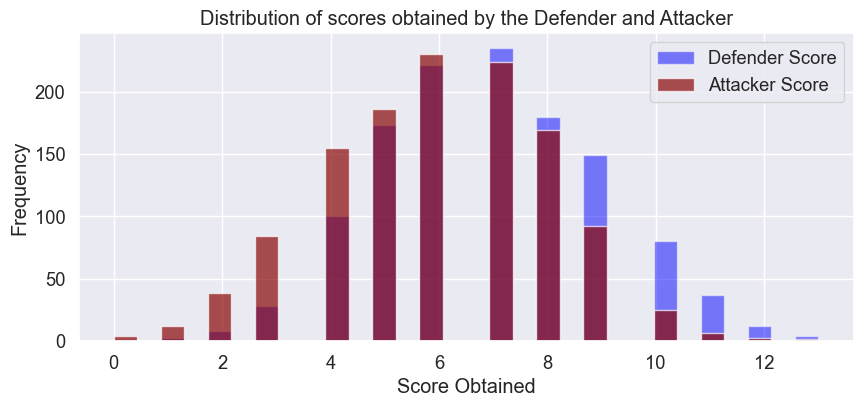

In [61]:
import pandas as pd

# Load the data
file_path = 'Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, delimiter=';')

# Handle missing values
# Drop rows where the 'Nickname' is missing
df = df.dropna(subset=['Nickname'])

# Convert data types
df['Defender_Score'] = pd.to_numeric(df['Defender_Score'], errors='coerce')
df['Attacker_Score'] = pd.to_numeric(df['Attacker_Score'], errors='coerce')
df['Time_in_seconds'] = pd.to_numeric(df['Time_in_seconds'], errors='coerce')

# Handle any remaining missing values (e.g., by filling with a default value or removing)
# df = df.fillna({'Defender_Score': 0, 'Attacker_Score': 0, 'Time_in_seconds': df['Time_in_seconds'].mean()})

# Remove duplicates
df = df.drop_duplicates()

# Additional processing
# Example: Creating a new column for the score difference
df['Score_Difference'] = df['Defender_Score'] - df['Attacker_Score']

# Save the cleaned data
output_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your desired output path
df.to_csv(output_path, index=False)

print("Data cleaned and saved to", output_path)

fig, ax = plt.subplots(figsize=(10, 4))

ax.hist(df['Defender_Score'], bins=30, alpha=0.5, color='blue', label='Defender Score')
ax.hist(df['Attacker_Score'], bins=30, alpha=0.7, color='#8A0707', label='Attacker Score')


# Add labels and a legend
ax.set_xlabel('Score Obtained')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of scores obtained by the Defender and Attacker')
ax.legend()

# Set x-axis ticks to increment by 2
# start, end = ax.get_xlim()
# ax.set_xticks(np.arange(start, end, 2))

ax.legend()

# Show the plot
plt.show()



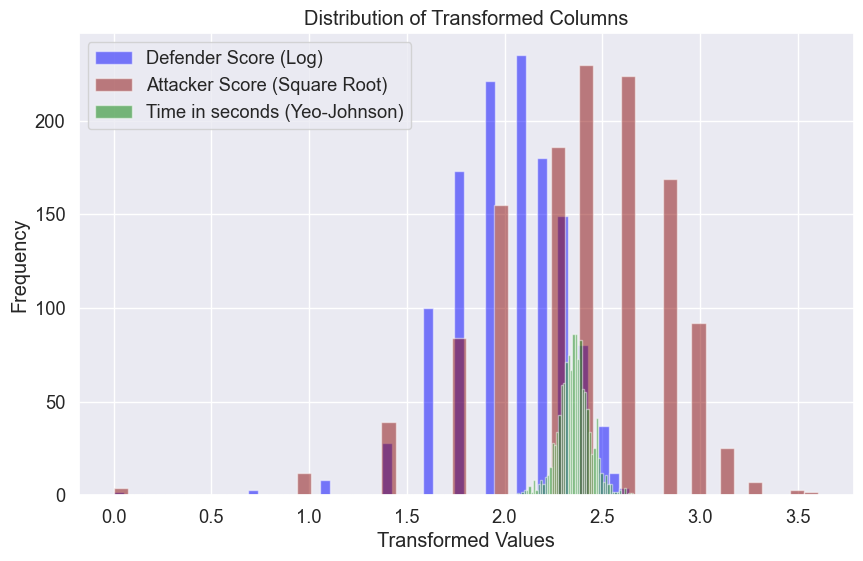

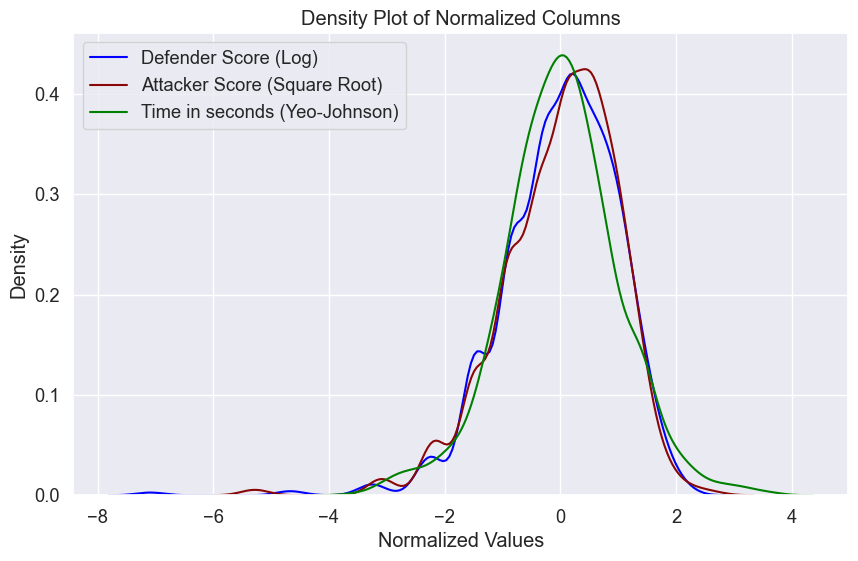

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load the cleaned data
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# --- Drop all duplicate rows --- #
df = df.drop_duplicates()

# --- Handling and transforming 'Time_in_seconds' --- #
# Ensure 'Time_in_seconds' has no negative values and apply a shift
df['Time_in_seconds'] = df['Time_in_seconds'].apply(lambda x: max(x, 0)) 

# Yeo-Johnson transformation applied to 'Time_in_seconds'
df['YJ_Time_in_seconds'], _ = stats.yeojohnson(df['Time_in_seconds'])

# --- Math transformations to reduce skewness on other columns --- #

# Log transformation applied to 'Defender_Score'
df['Log_Defender_Score'] = np.log(df['Defender_Score'] + 1)

# Square root transformation applied to 'Attacker_Score'
df['Sqrt_Attacker_Score'] = np.sqrt(df['Attacker_Score'])

# -- PLOTTING TRANSFORMED DATA -- #

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the transformed 'Defender_Score' column
ax.hist(df['Log_Defender_Score'], bins=50, alpha=0.5, color='blue', label='Defender Score (Log)')

# Plot the transformed 'Attacker_Score' column
ax.hist(df['Sqrt_Attacker_Score'], bins=50, alpha=0.5, color='#8A0707', label='Attacker Score (Square Root)')

# Plot the transformed 'YJ_Time_in_seconds' column
ax.hist(df['YJ_Time_in_seconds'], bins=50, alpha=0.5, color='green', label='Time in seconds (Yeo-Johnson)')

# Add labels and a legend
ax.set_xlabel('Transformed Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transformed Columns')
ax.legend()

# Show the plot
plt.show()

# Create a figure and axis for the density plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize each column's features
df_normalized = df.copy()
df_normalized[['Log_Defender_Score', 'Sqrt_Attacker_Score', 'YJ_Time_in_seconds']] = scaler.fit_transform(
    df[['Log_Defender_Score', 'Sqrt_Attacker_Score', 'YJ_Time_in_seconds']]
)

# Plot the density of the normalized 'Log_Defender_Score' column
sns.kdeplot(df_normalized['Log_Defender_Score'], color='blue', label='Defender Score (Log)', ax=ax)

# Plot the density of the normalized 'Sqrt_Attacker_Score' column
sns.kdeplot(df_normalized['Sqrt_Attacker_Score'], color='#8A0707', label='Attacker Score (Square Root)', ax=ax)

# Plot the density of the normalized 'YJ_Time_in_seconds' column
sns.kdeplot(df_normalized['YJ_Time_in_seconds'], color='green', label='Time in seconds (Yeo-Johnson)', ax=ax)

# Add labels and a legend
ax.set_xlabel('Normalized Values')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Normalized Columns')
ax.legend()

# Show the plot
plt.show()


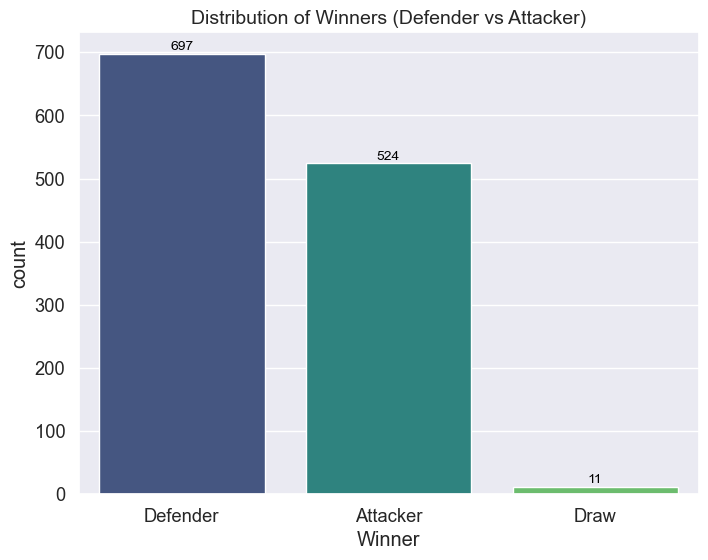

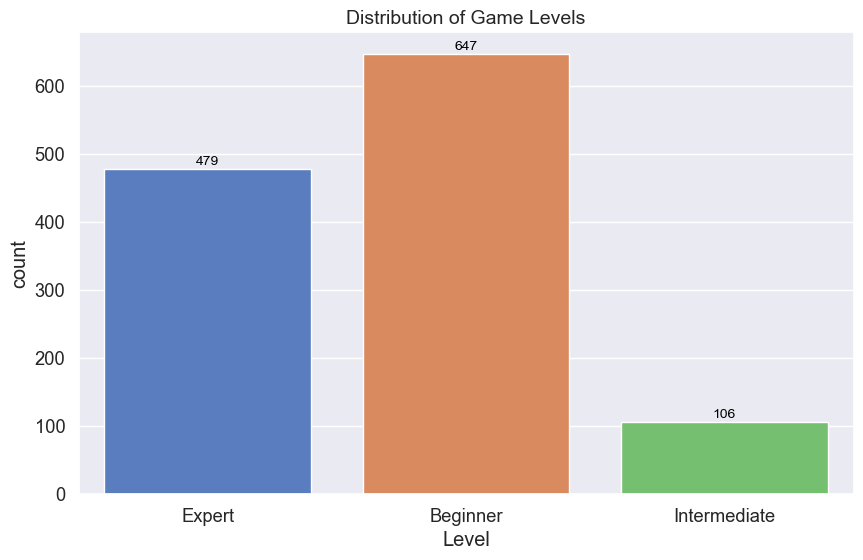

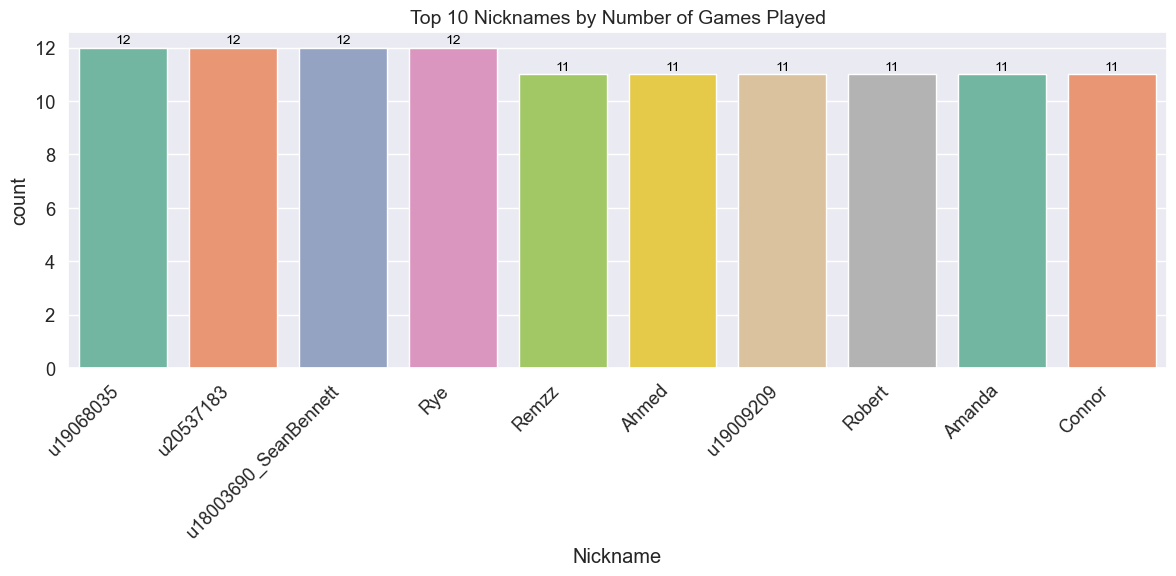

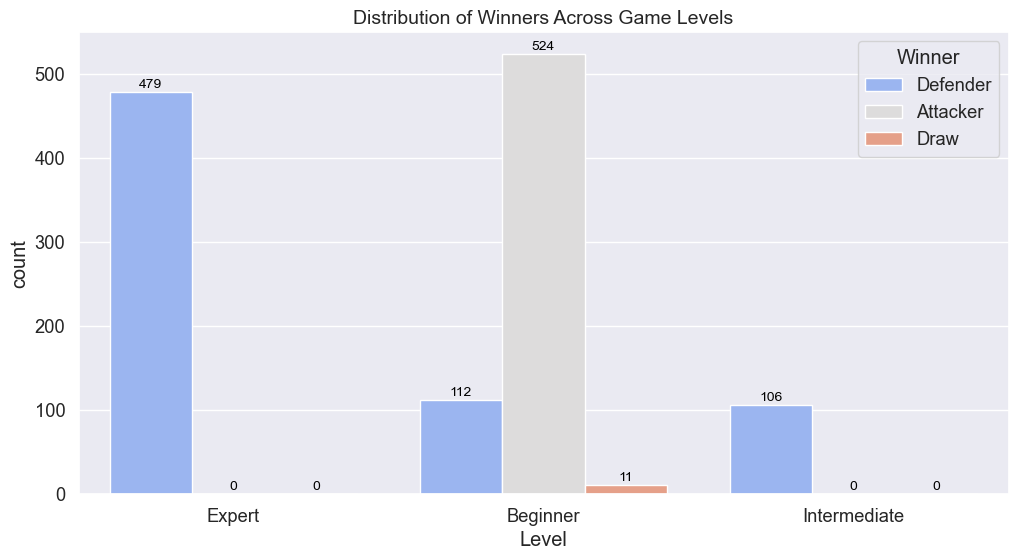

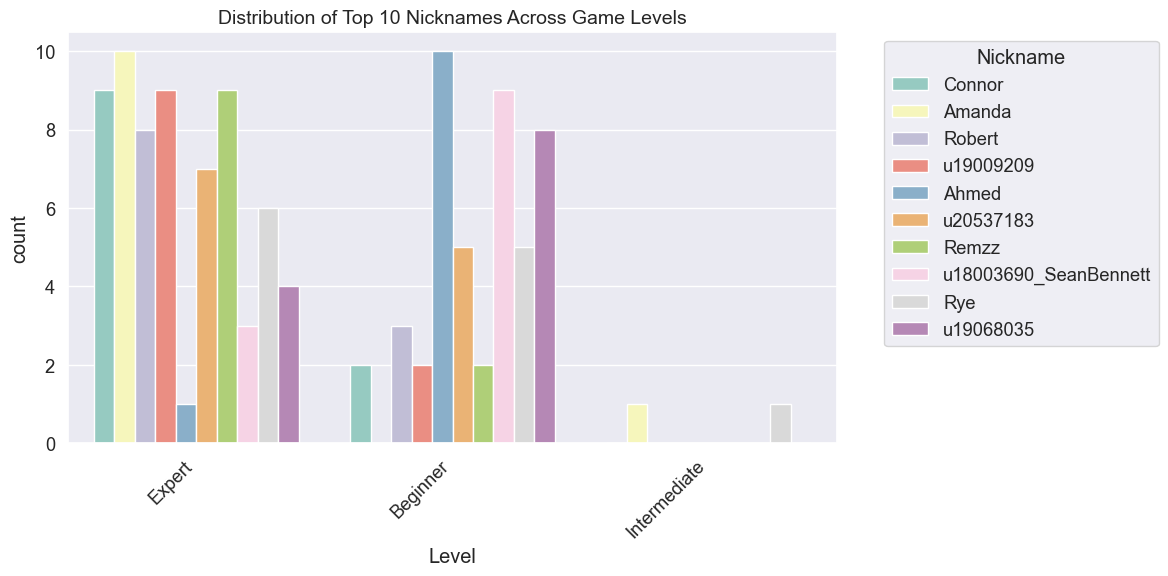

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
file_path = 'Cleaned_Game_Analytics_Dataset.csv'
df = pd.read_csv(file_path)

# Function to add annotations to the bars
def annotate_barplot(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# --- Count visualizations --- #

# Winner count
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Winner', data=df, palette='viridis')
plt.title('Distribution of Winners (Defender vs Attacker)', fontsize=14)
annotate_barplot(ax)
plt.show()

# Level count
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Level', data=df, palette='muted')
plt.title('Distribution of Game Levels', fontsize=14)
annotate_barplot(ax)
plt.show()

# If Nickname has too many unique values, consider grouping or displaying the top N
top_n = 10  # Adjust the top N value as necessary
top_nicknames = df['Nickname'].value_counts().nlargest(top_n).index
filtered_df = df[df['Nickname'].isin(top_nicknames)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Nickname', data=filtered_df, palette='Set2', order=top_nicknames)
plt.title(f'Top {top_n} Nicknames by Number of Games Played', fontsize=14)
plt.xticks(rotation=45, ha='right')
annotate_barplot(ax)
plt.tight_layout()
plt.show()

# Combine the analysis of Level and Winner using a grouped bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Level', hue='Winner', data=df, palette='coolwarm')
plt.title('Distribution of Winners Across Game Levels', fontsize=14)
annotate_barplot(ax)
plt.legend(title='Winner')
plt.show()

# Additional categorical columns if needed
# Example: Distribution of Nicknames across levels
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Level', hue='Nickname', data=filtered_df, palette='Set3')
plt.title(f'Distribution of Top {top_n} Nicknames Across Game Levels', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nickname', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


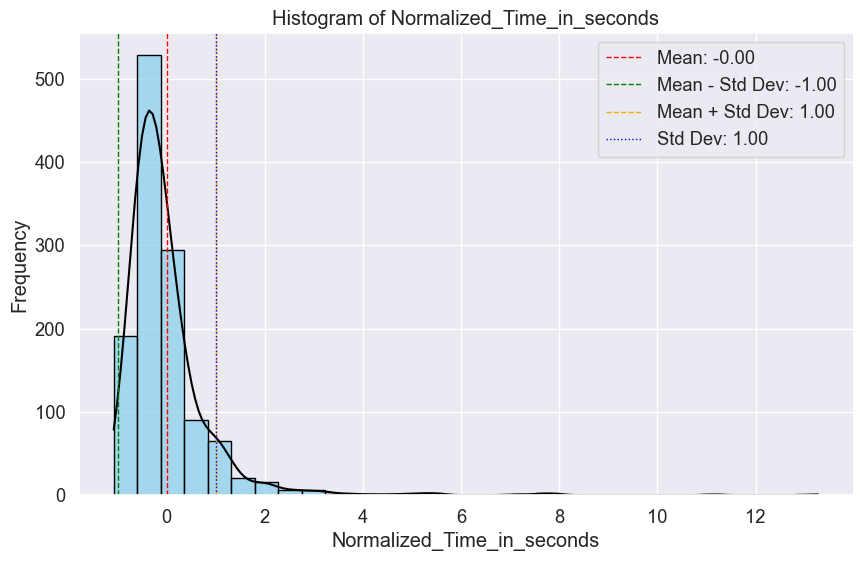

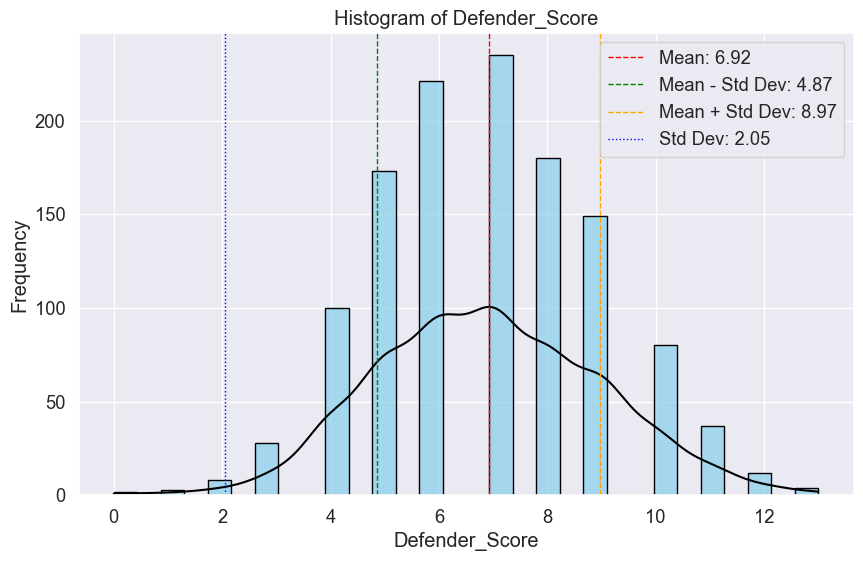

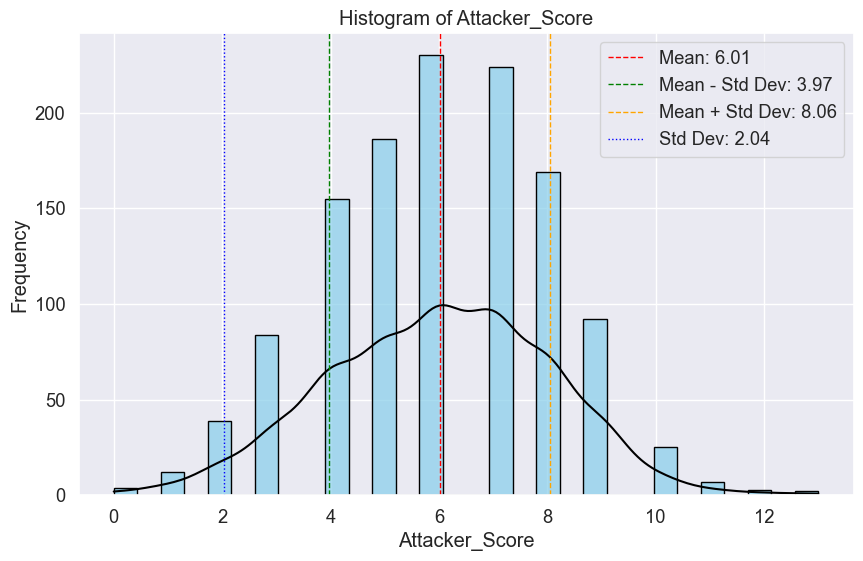

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Function to normalize the "Time_in_seconds" column using Z-score normalization
def normalize_column_z_score(df, column):
    normalized_column = (df[column] - df[column].mean()) / df[column].std()
    return normalized_column

# Apply z-score normalization to the "Time_in_seconds" column
df['Normalized_Time_in_seconds'] = normalize_column_z_score(df, 'Time_in_seconds')

# Function to plot histogram with mean and standard deviation lines
def plot_histogram_with_stats(df, feature, bins=30):
    data = df[feature]
    mean = np.mean(data)
    std_dev = np.std(data)
    
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data, bins=bins, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
    ax.lines[0].set_color('black')

    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
    plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
    plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

    plt.legend(loc='upper right')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualizations for relevant numeric columns in your dataset

# Z-score normalized Time_in_seconds
plot_histogram_with_stats(df, 'Normalized_Time_in_seconds')

# Defender_Score
plot_histogram_with_stats(df, 'Defender_Score')

# Attacker_Score
plot_histogram_with_stats(df, 'Attacker_Score')

# Example: If you have any other numeric column to visualize, add it here
# plot_histogram_with_stats(df, 'Other_Numeric_Column')


Summary Statistics:
        Time_in_seconds  Defender_Score  Attacker_Score
count      1232.000000     1232.000000     1232.000000
mean        164.657468        6.918019        6.013799
std         118.512557        2.053453        2.043151
min          37.000000        0.000000        0.000000
25%         105.000000        5.000000        5.000000
50%         139.000000        7.000000        6.000000
75%         185.000000        8.000000        7.000000
max        1738.000000       13.000000       13.000000

First few rows:
     Nickname  Defender_Score  Attacker_Score  Time_in_seconds    Winner   Level  Score_Difference
0  u20444550             8.0             5.0            138.0  Defender  Expert               3.0
1  u20444550             8.0             5.0            137.0  Defender  Expert               3.0
2  u20444550            10.0             3.0            118.0  Defender  Expert               7.0
3  u20444550             8.0             5.0            112.0  Defender  E

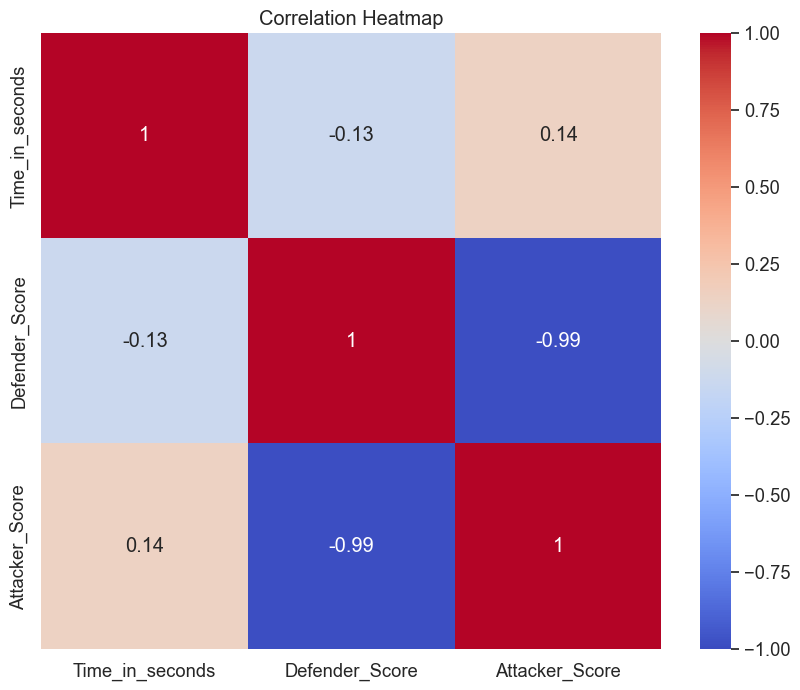


Cleaned dataset saved to Cleaned_Game_Analytics_Dataset_Processed.csv


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# --- Summary Statistics --- #

# Replace these column names with the relevant numeric columns in your dataset
summary_stats = df[['Time_in_seconds', 'Defender_Score', 'Attacker_Score']].describe()
print("Summary Statistics:\n", summary_stats)

# Display first few rows
print("\nFirst few rows:\n", df.head())

# Display last few rows
print("\nLast few rows:\n", df.tail())

# Calculate the median of the columns
median_values = df[['Time_in_seconds', 'Defender_Score', 'Attacker_Score']].median()
print("\nMedian Values:\n", median_values)

# --- Correlations --- #

# Calculate the correlation matrix
c_matrix = df[['Time_in_seconds', 'Defender_Score', 'Attacker_Score']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# (Optional) Save the cleaned dataset as a new CSV file
output_path = 'Cleaned_Game_Analytics_Dataset_Processed.csv'
df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to {output_path}")


In [66]:
!pip install pandas-profiling


  Obtaining dependency information for visions[type_image_path]==0.7.4 from https://files.pythonhosted.org/packages/66/00/166b2beb8046f06b77a2bf2c1dafeb52eff608f7dd420c767d5f3ce36ef5/visions-0.7.4-py3-none-any.whl.metadata
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.10.0 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [67]:
pip install -U ydata-profiling


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.



  Obtaining dependency information for visions[type_image_path]<0.7.7,>=0.7.5 from https://files.pythonhosted.org/packages/7c/bf/612b24e711ae25dea9af19b9304634b8949faa0b035fad47e8bcadf62f59/visions-0.7.6-py3-none-any.whl.metadata
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


In [68]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Generate the EDA report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Display the report in the notebook (or open it in a browser)
profile.to_file("EDA_Report.html")  # Saves the report as an HTML file

# Optionally, if you want to directly open in a browser (Jupyter Notebook)
# profile.to_notebook_iframe()  # Displays the report directly in a Jupyter Notebook


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
import pandas as pd

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Specify the numerical features in your dataset
numerical_features = ['Time_in_seconds', 'Defender_Score', 'Attacker_Score']  # Replace with your actual numerical columns

# Generate and display summary statistics (count, mean, std, etc.)
summary_stats = df[numerical_features].describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
        Time_in_seconds  Defender_Score  Attacker_Score
count      1232.000000     1232.000000     1232.000000
mean        164.657468        6.918019        6.013799
std         118.512557        2.053453        2.043151
min          37.000000        0.000000        0.000000
25%         105.000000        5.000000        5.000000
50%         139.000000        7.000000        6.000000
75%         185.000000        8.000000        7.000000
max        1738.000000       13.000000       13.000000


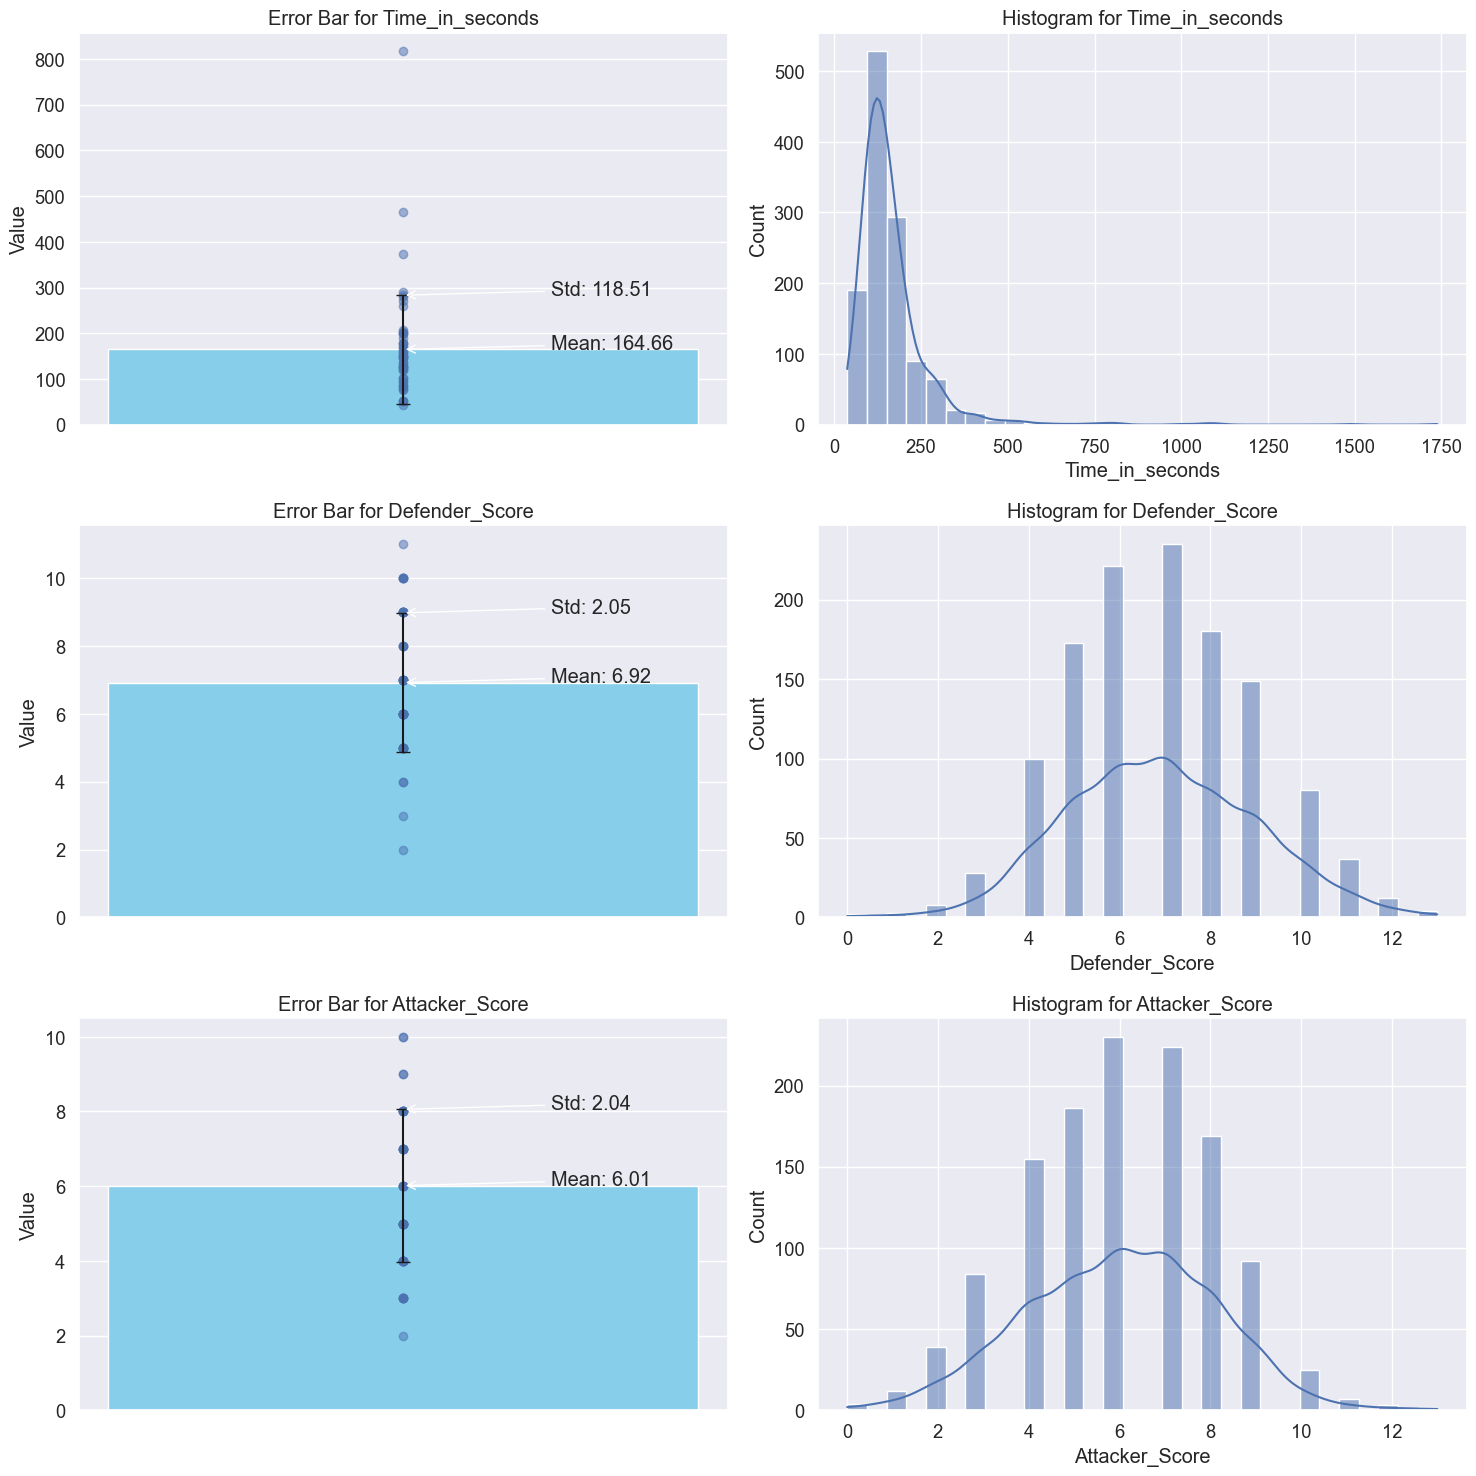

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Specify the numerical features in your dataset
numerical_features = ['Time_in_seconds', 'Defender_Score', 'Attacker_Score']  # Replace with your actual numerical columns

# Generate the summary statistics
describe_df = df[numerical_features].describe()

# Create subplots
num_features = len(numerical_features)
fig, axs = plt.subplots(num_features, 2, figsize=(15, 5 * num_features))

# Loop through each feature to plot the graphs
for i, feature in enumerate(numerical_features):
    
    # Error bar for mean and standard deviation
    axs[i, 0].bar(x=0, height=describe_df.loc['mean', feature], yerr=describe_df.loc['std', feature], capsize=5, color='skyblue')
    axs[i, 0].set_title(f'Error Bar for {feature}')
    axs[i, 0].set_ylabel('Value')
    axs[i, 0].set_xticks([])  # Remove x-ticks as they're not necessary here
    
    # Add detailed annotations
    axs[i, 0].annotate(f"Mean: {describe_df.loc['mean', feature]:.2f}", xy=(0, describe_df.loc['mean', feature]), xytext=(0.2, describe_df.loc['mean', feature]), arrowprops=dict(arrowstyle="->"))
    axs[i, 0].annotate(f"Std: {describe_df.loc['std', feature]:.2f}", xy=(0, describe_df.loc['mean', feature] + describe_df.loc['std', feature]), xytext=(0.2, describe_df.loc['mean', feature] + describe_df.loc['std', feature]), arrowprops=dict(arrowstyle="->"))
    
    # Plot individual data points as an overlay (optional)
    y = df[feature].sample(50)  # sample 50 points for better visibility
    axs[i, 0].scatter(np.zeros_like(y), y, alpha=0.5)
    
    # Histogram for counts
    sns.histplot(df[feature], bins=30, kde=True, ax=axs[i, 1])
    axs[i, 1].set_title(f'Histogram for {feature}')
    axs[i, 1].set_xlabel(f'{feature}')
    axs[i, 1].set_ylabel('Count')
    
plt.tight_layout()
plt.show()


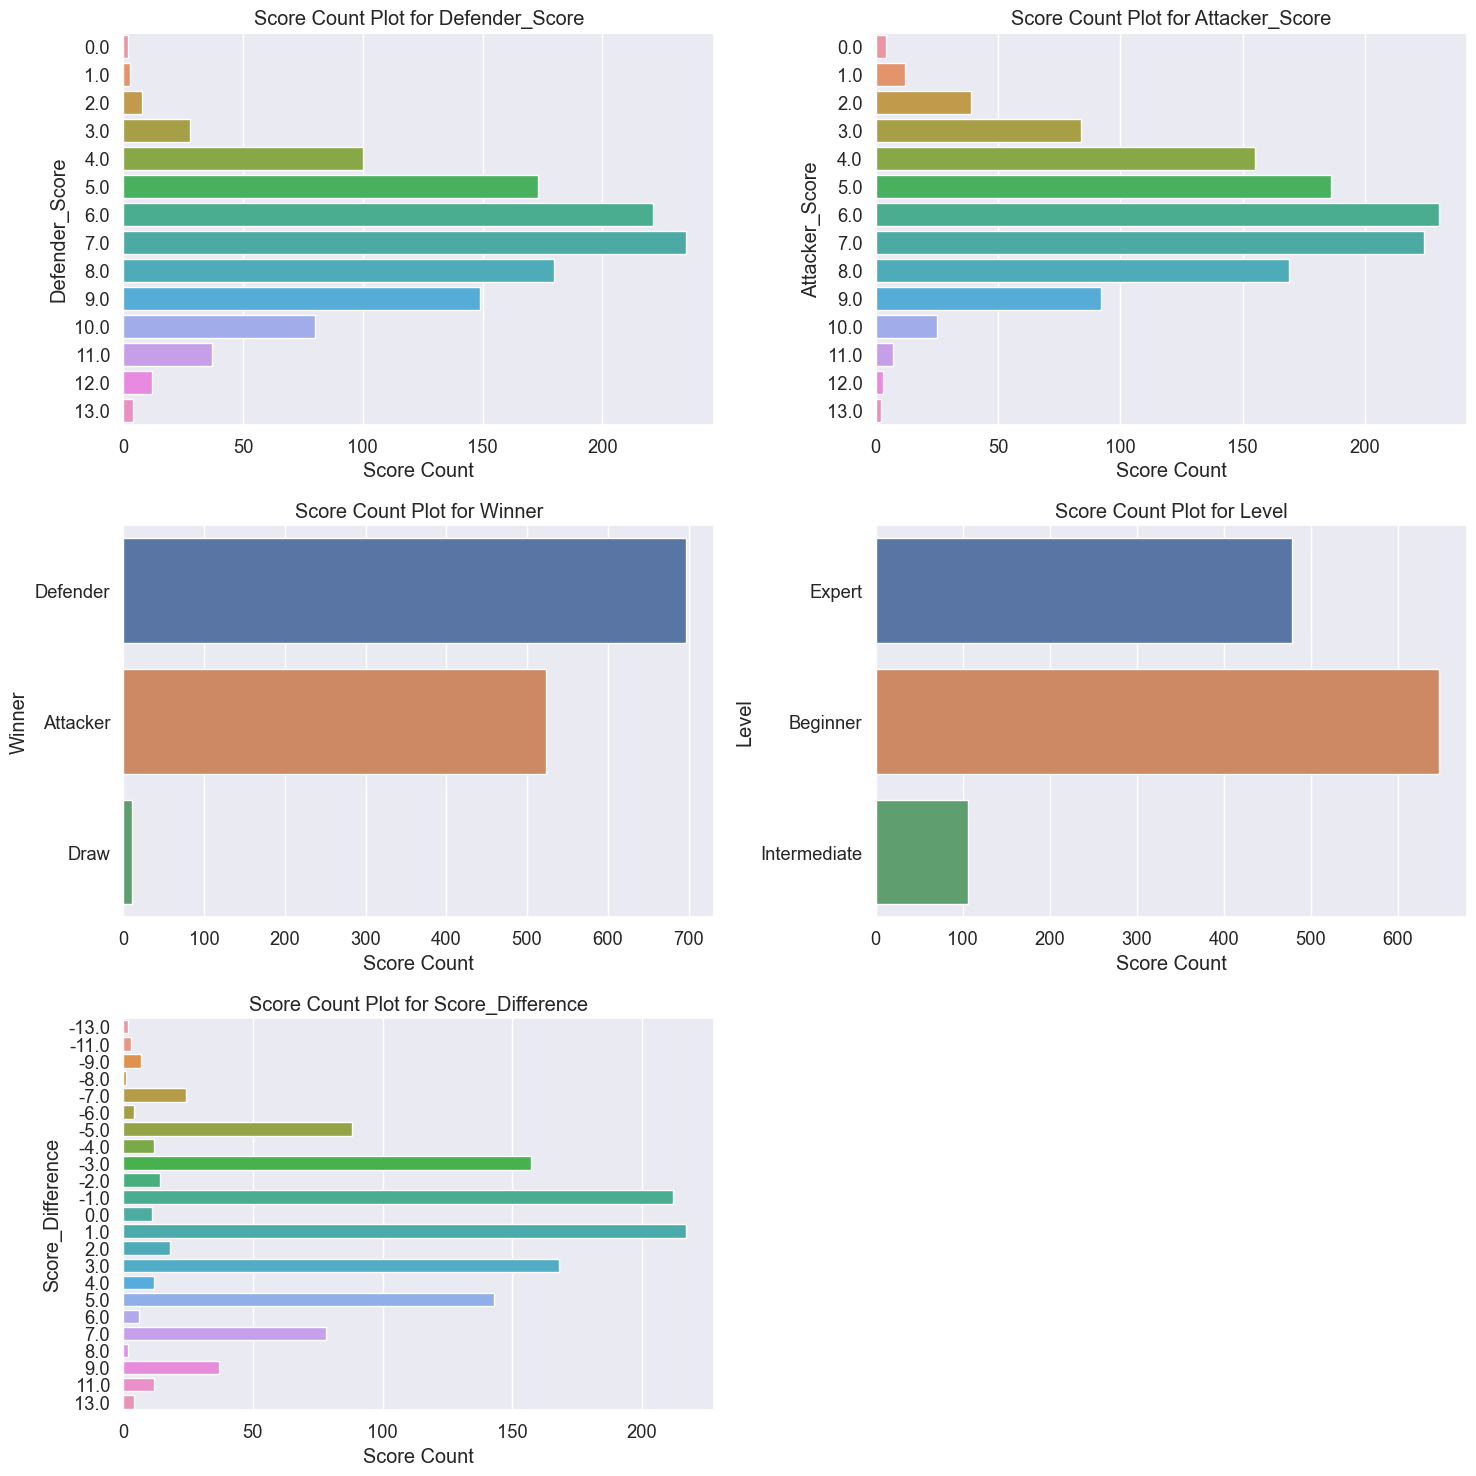

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)
# print(df.columns)

# Specify the categorical features in your dataset
categorical_features = ['Defender_Score', 'Attacker_Score', 'Winner', 'Level', 'Score_Difference']

# Determine the number of rows needed for the subplots
num_rows = int(len(categorical_features) / 2) + len(categorical_features) % 2

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Create the bar graphs
axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, y=feature, ax=axs[i])
    axs[i].set_title(f'Score Count Plot for {feature}')
    axs[i].set_ylabel(f'{feature}')
    axs[i].set_xlabel('Score Count')

# Remove any unused subplots
for i in range(len(categorical_features), num_rows * 2):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


Missing values in numerical features:
Time_in_seconds     0
Defender_Score      0
Attacker_Score      0
Score_Difference    0
dtype: int64

Variance of numerical features:
Time_in_seconds     14045.226199
Defender_Score          4.216669
Attacker_Score          4.174464
Score_Difference       16.715433
dtype: float64

Skewness:
Time_in_seconds     5.550159
Defender_Score      0.104208
Attacker_Score     -0.085539
Score_Difference    0.097387
dtype: float64

Kurtosis:
Time_in_seconds     50.350507
Defender_Score      -0.105517
Attacker_Score      -0.106179
Score_Difference    -0.101245
dtype: float64



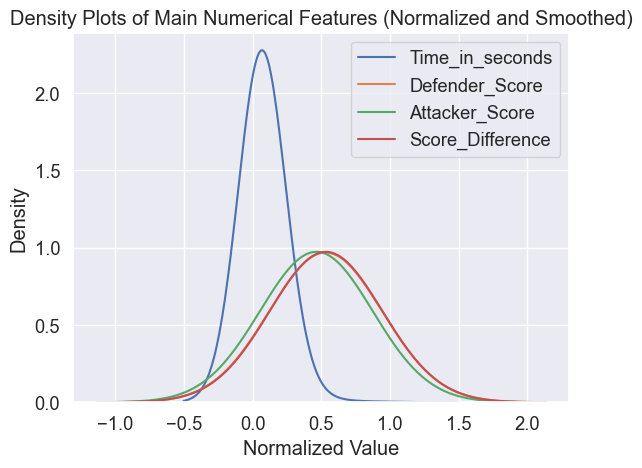

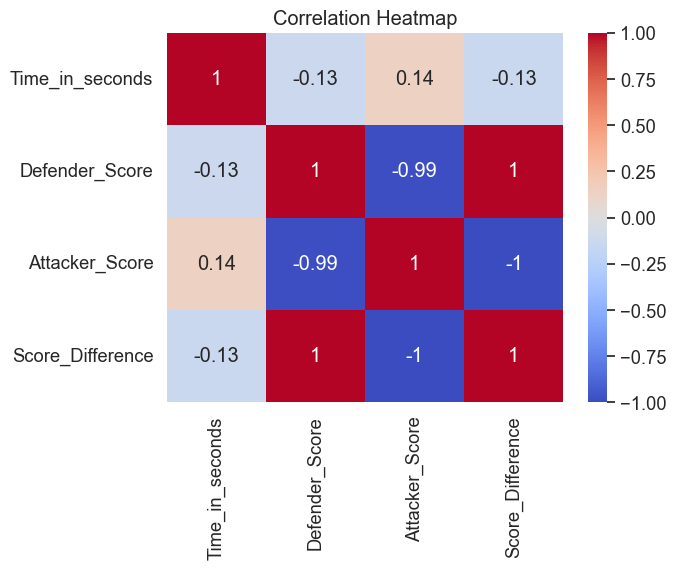

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Specify the main numerical features in your dataset
main_numerical_features = df[['Time_in_seconds', 'Defender_Score', 'Attacker_Score', 'Score_Difference']]

# Check for missing or non-numeric values
print("Missing values in numerical features:")
print(main_numerical_features.isna().sum())

# Optionally, fill missing values or drop rows with missing values
df = df.dropna(subset=main_numerical_features.columns)
# df = df.fillna(df.mean())  # Optionally fill missing values with the mean

# Check for zero variance
print("\nVariance of numerical features:")
print(main_numerical_features.var())

# Recalculate skewness & kurtosis
print("\nSkewness:")
print(main_numerical_features.apply(lambda x: stats.skew(x)))
print()
print("Kurtosis:")
print(main_numerical_features.apply(lambda x: stats.kurtosis(x)))
print()

# Normalize the features to the [0, 1] range
normalized_df = pd.DataFrame(MinMaxScaler().fit_transform(main_numerical_features), columns=main_numerical_features.columns)

# Create a density plot for each feature
for feature in normalized_df.columns:
    sns.kdeplot(normalized_df[feature], label=feature, bw_adjust=10)

# Customize the plot
plt.title('Density Plots of Main Numerical Features (Normalized and Smoothed)')
plt.xlabel('Normalized Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

# Correlation heatmap
sns.heatmap(main_numerical_features.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [73]:
import pandas as pd
import plotly.express as px

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Group by 'Nickname' and sum 'Defender_Score'
nickname_defender_score = df.groupby('Nickname')['Defender_Score'].sum()

# Sort the values in descending order
nickname_defender_score = nickname_defender_score.sort_values(ascending=False)

# Create a bar plot for total Defender_Score per Nickname
fig = px.bar(
    x=nickname_defender_score.index,
    y=nickname_defender_score.values,
    text=nickname_defender_score.values,
    title='Total Defender Score per Nickname'
)

fig.update_traces(texttemplate='%{text}', textposition='outside')  # Display text labels on the bars

fig.show()

# Count the number of occurrences of each Nickname
nickname_counts = df['Nickname'].value_counts()

# Calculate the average Defender_Score per Nickname
average_score_per_nickname = (nickname_defender_score / nickname_counts).round(2)

# Create a DataFrame for the average values
average_df = pd.DataFrame({
    'Nickname': average_score_per_nickname.index,
    'Average Defender Score per Nickname': average_score_per_nickname.values
})

# Sort the DataFrame by average Defender_Score in descending order
average_df = average_df.sort_values(by='Average Defender Score per Nickname', ascending=False)

# Create a bar plot for the average Defender Score per Nickname
fig = px.bar(
    average_df,
    x='Nickname',
    y='Average Defender Score per Nickname',
    text='Average Defender Score per Nickname',
    title='Average Defender Score per Nickname'
)

fig.update_traces(texttemplate='%{text}', textposition='outside')  

fig.show()


In [74]:
import pandas as pd
import plotly.express as px

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Create a pivot table that groups by 'Nickname' and 'Winner', and counts occurrences
pivot_table = df.groupby(['Nickname', 'Winner']).size().unstack(fill_value=0)

# Create a bar chart for the distribution of Winners for Each Nickname
fig = px.bar(
    pivot_table,
    title='Winner Distribution for Each Nickname',
    labels={'x': 'Nickname', 'y': 'Count'},
    color_discrete_map={'WinnerA': 'blue', 'WinnerB': 'green', 'WinnerC': 'red'}  # Adjust based on your actual winner categories
)

# Show the plot
fig.show()


MACHINE LEARNING

In [75]:
import pandas as pd
from sklearn import preprocessing

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Initialize the LabelEncoder
lab_encoder = preprocessing.LabelEncoder()

# Encode categorical variables
df['Nickname'] = lab_encoder.fit_transform(df['Nickname'])
df['Winner'] = lab_encoder.fit_transform(df['Winner'])
df['Level'] = lab_encoder.fit_transform(df['Level'])

# Assuming you have other categorical columns, encode them similarly
# For example:
# df['Another_Categorical_Column'] = lab_encoder.fit_transform(df['Another_Categorical_Column'])

# Display the transformed DataFrame
df.head()


,Nickname,Defender_Score,Attacker_Score,Time_in_seconds,Winner,Level,Score_Difference
0,509,8.0,5.0,138.0,1,1,3.0
1,509,8.0,5.0,137.0,1,1,3.0
2,509,10.0,3.0,118.0,1,1,7.0
3,509,8.0,5.0,112.0,1,1,3.0
4,509,9.0,4.0,107.0,1,1,5.0


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# If `Score_Difference` was the last column, remove it before splitting
df = df.drop(columns=['Score_Difference'])

# Separate features (X) and the target variable (y)
# Assuming the target variable is now the last column after removing `Score_Difference`
X = df.iloc[:, :-1]  # All rows, all columns except the last one (features)
y = df.iloc[:, -1]   # All rows, only the last column (target variable)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing labels shape (y_test):", y_test.shape)


Training set shape (X_train): (985, 5)
Testing set shape (X_test): (247, 5)
Training labels shape (y_train): (985,)
Testing labels shape (y_test): (247,)


In [77]:
X_train
X_test
y_train
y_test

549     Intermediate
1050          Expert
244           Expert
553         Beginner
1165          Expert
            ...     
88      Intermediate
634           Expert
298           Expert
376           Expert
754     Intermediate
Name: Level, Length: 247, dtype: object

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Identify categorical columns in X
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['Level'])  # All columns except 'Level'
y = df['Level']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Initialize the models
rf = RandomForestClassifier(random_state=42)
svm = LinearSVC(random_state=42)
nb = GaussianNB()

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('rf', rf), ('svm', svm), ('nb', nb)],
    final_estimator=DecisionTreeClassifier(random_state=42)
)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9919028340080972
Precision: 0.9920334334595795
Recall: 0.9919028340080972
F1 Score: 0.9918871741557592

Confusion Matrix:
[[122   0   0]
 [  1  97   0]
 [  1   0  26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.99      0.99        98
           2       1.00      0.96      0.98        27

    accuracy                           0.99       247
   macro avg       0.99      0.98      0.99       247
weighted avg       0.99      0.99      0.99       247



In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Identify categorical columns in X
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['Level'])  # All columns except 'Level'
y = df['Level']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(rf_pred, y_test)
rf_report = classification_report(rf_pred, y_test)
rf_matrix = confusion_matrix(rf_pred, y_test)

# Print evaluation metrics
print('Accuracy of Random Forest : ', round(rf_accuracy, 3))
print('Classification report of Random Forest : \n', rf_report)
print('Confusion Matrix of Random Forest : \n', rf_matrix)


Accuracy of Random Forest :  0.996
Classification report of Random Forest : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       123
           1       1.00      1.00      1.00        98
           2       0.96      1.00      0.98        26

    accuracy                           1.00       247
   macro avg       0.99      1.00      0.99       247
weighted avg       1.00      1.00      1.00       247

Confusion Matrix of Random Forest : 
 [[122   0   1]
 [  0  98   0]
 [  0   0  26]]


In [80]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Identify categorical columns in X
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['Level'])  # All columns except 'Level'
y = df['Level']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Initialize and train the LinearSVC model
svr = LinearSVC(random_state=42)
svr.fit(X_train, y_train)

# Make predictions on the test data
svr_pred = svr.predict(X_test)

# Evaluate the model
svr_accuracy = accuracy_score(svr_pred, y_test)
svr_report = classification_report(svr_pred, y_test)
svr_matrix = confusion_matrix(svr_pred, y_test)

# Print evaluation metrics
print('Accuracy of SVM : ', round(svr_accuracy, 3))
print('Classification report of SVM : \n', svr_report)
print('Confusion Matrix of SVM :\n', svr_matrix)


Accuracy of SVM :  0.854
Classification report of SVM : 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       131
           1       0.97      0.82      0.89       116
           2       0.00      0.00      0.00         0

    accuracy                           0.85       247
   macro avg       0.64      0.57      0.60       247
weighted avg       0.96      0.85      0.90       247

Confusion Matrix of SVM :
 [[116   3  12]
 [  6  95  15]
 [  0   0   0]]


c:\Users\fabio\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fabio\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\fabio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fabio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

Accuracy of SVM :  0.854
Classification report of SVM : 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       131
           1       0.97      0.82      0.89       116
           2       0.00      0.00      0.00         0

    accuracy                           0.85       247
   macro avg       0.64      0.57      0.60       247
weighted avg       0.96      0.85      0.90       247

Confusion Matrix of SVM :
 [[116   3  12]
 [  6  95  15]
 [  0   0   0]]


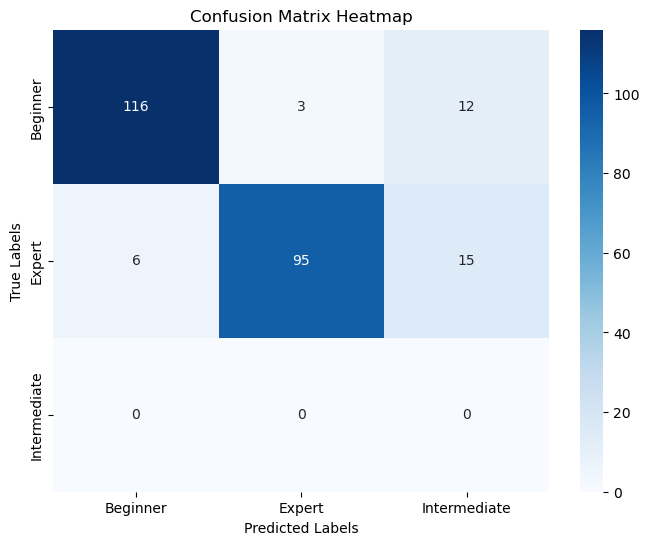

ROC Curve is only applicable for binary classification.


In [2]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Identify categorical columns in X
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['Level'])  # All columns except 'Level'
y = df['Level']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Initialize and train the LinearSVC model
svr = LinearSVC(random_state=42)
svr.fit(X_train, y_train)

# Make predictions on the test data
svr_pred = svr.predict(X_test)

# Evaluate the model
svr_accuracy = accuracy_score(svr_pred, y_test)
svr_report = classification_report(svr_pred, y_test)
svr_matrix = confusion_matrix(svr_pred, y_test)

# Print evaluation metrics
print('Accuracy of SVM : ', round(svr_accuracy, 3))
print('Classification report of SVM : \n', svr_report)
print('Confusion Matrix of SVM :\n', svr_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svr_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Level'].classes_, yticklabels=label_encoders['Level'].classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve (for binary classification)
if len(label_encoders['Level'].classes_) == 2:
    y_score = svr.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = roc_auc_score(y_test, y_score)

    # Plot the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for a random classifier
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC Curve is only applicable for binary classification.")


Accuracy of Naive Bayes :  0.947
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       111
           1       0.98      0.98      0.98        98
           2       1.00      0.71      0.83        38

    accuracy                           0.95       247
   macro avg       0.96      0.90      0.92       247
weighted avg       0.95      0.95      0.94       247

Confusion Matrix of Naive Bayes :
 [[111   0   0]
 [  2  96   0]
 [  9   2  27]]


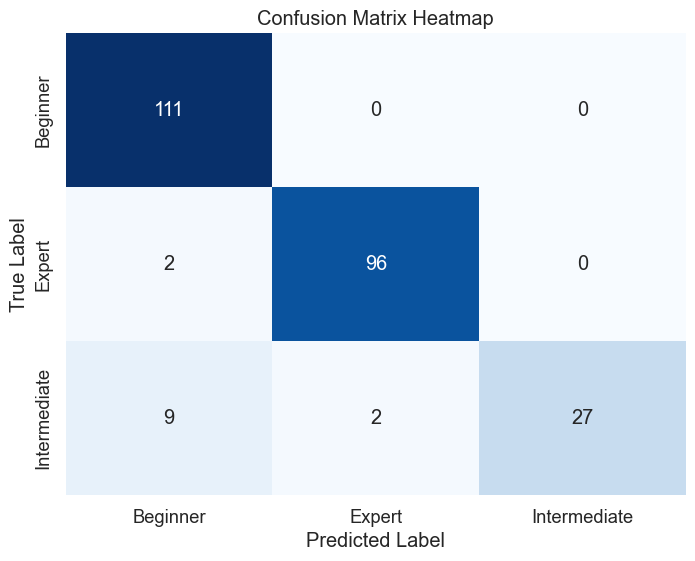

In [81]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Identify categorical columns in X
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['Level'])  # All columns except 'Level'
y = df['Level']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
nb_pred = nb.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test)
nb_matrix = confusion_matrix(nb_pred, y_test)

# Print evaluation metrics
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', nb_report)
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability

# Define class labels (these should be your actual class names)
class_names = label_encoders['Level'].classes_

sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


Accuracy of Naive Bayes :  0.947
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       111
           1       0.98      0.98      0.98        98
           2       1.00      0.71      0.83        38

    accuracy                           0.95       247
   macro avg       0.96      0.90      0.92       247
weighted avg       0.95      0.95      0.94       247

Confusion Matrix of Naive Bayes :
 [[111   0   0]
 [  2  96   0]
 [  9   2  27]]


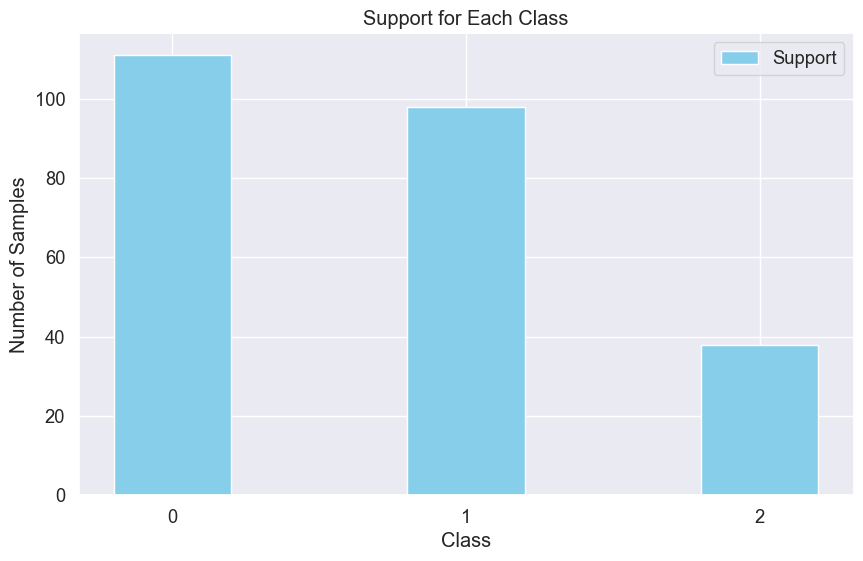

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Identify categorical columns in X
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['Level'])  # All columns except 'Level'
y = df['Level']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
nb_pred = nb.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test, output_dict=True)
nb_matrix = confusion_matrix(nb_pred, y_test)

# Extract support for all classes
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]
support = [nb_report[label]['support'] if label in nb_report else 0 for label in labels]

# Print evaluation metrics
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)

# Plot support for each class
plt.figure(figsize=(10, 6))
plt.bar(labels, support, width=0.4, color='skyblue', label='Support', align='center')

plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(labels)
plt.legend()
plt.title('Support for Each Class')
plt.show()


Accuracy of Naive Bayes :  0.947
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       111
           1       0.98      0.98      0.98        98
           2       1.00      0.71      0.83        38

    accuracy                           0.95       247
   macro avg       0.96      0.90      0.92       247
weighted avg       0.95      0.95      0.94       247

Confusion Matrix of Naive Bayes :
 [[111   0   0]
 [  2  96   0]
 [  9   2  27]]


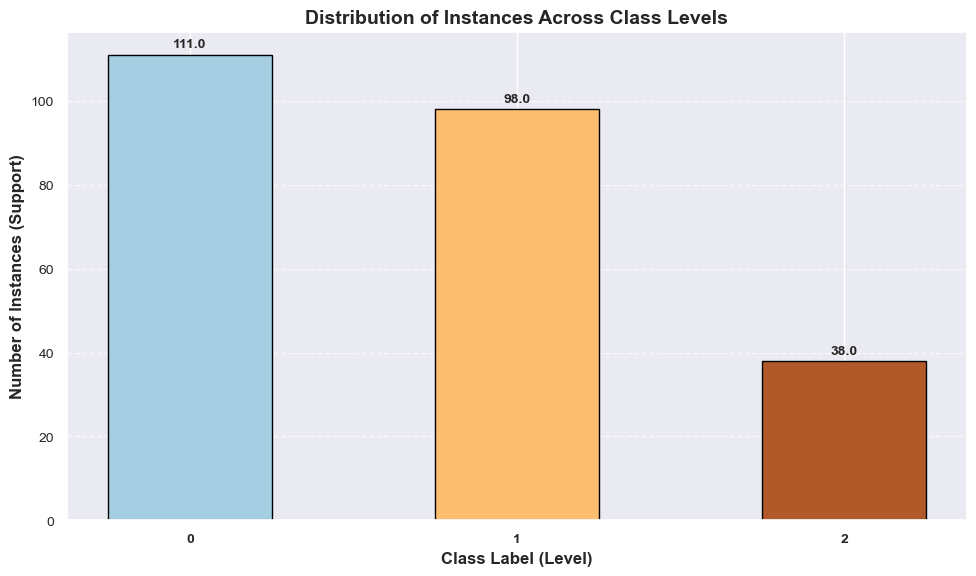

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Identify categorical columns in X
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['Level'])  # All columns except 'Level'
y = df['Level']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
nb_pred = nb.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test, output_dict=True)
nb_matrix = confusion_matrix(nb_pred, y_test)

# Extract support for all classes
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]
support = [nb_report[label]['support'] if label in nb_report else 0 for label in labels]

# Print evaluation metrics
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)

# Plot support for each class
plt.figure(figsize=(10, 6))

# Use color palette for better visualization
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

# Bar plot with improved styling
plt.bar(labels, support, width=0.5, color=colors, edgecolor='black', label='Support')

# Add data labels on top of the bars
for i, val in enumerate(support):
    plt.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add clear axis labels and title
plt.xlabel('Class Label (Level)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Instances (Support)', fontsize=12, fontweight='bold')
plt.xticks(labels, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)
plt.title('Distribution of Instances Across Class Levels', fontsize=14, fontweight='bold')

# Add grid lines to help visualize the support levels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


Accuracy of Naive Bayes :  0.947
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       111
           1       0.98      0.98      0.98        98
           2       1.00      0.71      0.83        38

    accuracy                           0.95       247
   macro avg       0.96      0.90      0.92       247
weighted avg       0.95      0.95      0.94       247



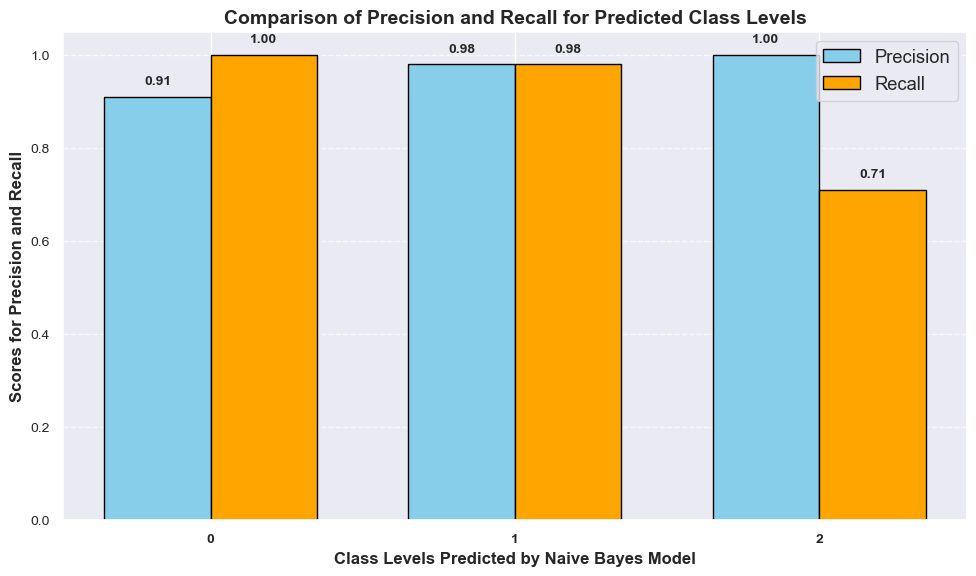

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Identify categorical columns in X
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['Level'])  # All columns except 'Level'
y = df['Level']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
nb_pred = nb.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test, output_dict=True)
nb_matrix = confusion_matrix(nb_pred, y_test)

# Extract precision and recall for all classes
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]  # Get all unique labels
precision = [nb_report[label]['precision'] if label in nb_report else 0.0 for label in labels]
recall = [nb_report[label]['recall'] if label in nb_report else 0.0 for label in labels]

# Print evaluation metrics
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))

# Plot precision and recall
plt.figure(figsize=(10, 6))

# Bar plot with improved styling
bar_width = 0.35
index = np.arange(len(labels))

plt.bar(index, precision, bar_width, label='Precision', color='skyblue', edgecolor='black')
plt.bar(index + bar_width, recall, bar_width, label='Recall', color='orange', edgecolor='black')

# Add data labels on top of the bars
for i in range(len(labels)):
    plt.text(i, precision[i] + 0.02, f'{precision[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(i + bar_width, recall[i] + 0.02, f'{recall[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add clear axis labels and title
plt.xlabel('Class Levels Predicted by Naive Bayes Model', fontsize=12, fontweight='bold')
plt.ylabel('Scores for Precision and Recall', fontsize=12, fontweight='bold')
plt.xticks(index + bar_width / 2, labels, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)
plt.title('Comparison of Precision and Recall for Predicted Class Levels', fontsize=14, fontweight='bold')

# Add a legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


Accuracy of Stacking Classifier :  0.996
Classification report of Stacking Classifier : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       123
           1       1.00      1.00      1.00        98
           2       0.96      1.00      0.98        26

    accuracy                           1.00       247
   macro avg       0.99      1.00      0.99       247
weighted avg       1.00      1.00      1.00       247

Confusion Matrix of Stacking Classifier : 
 [[122   0   1]
 [  0  98   0]
 [  0   0  26]]


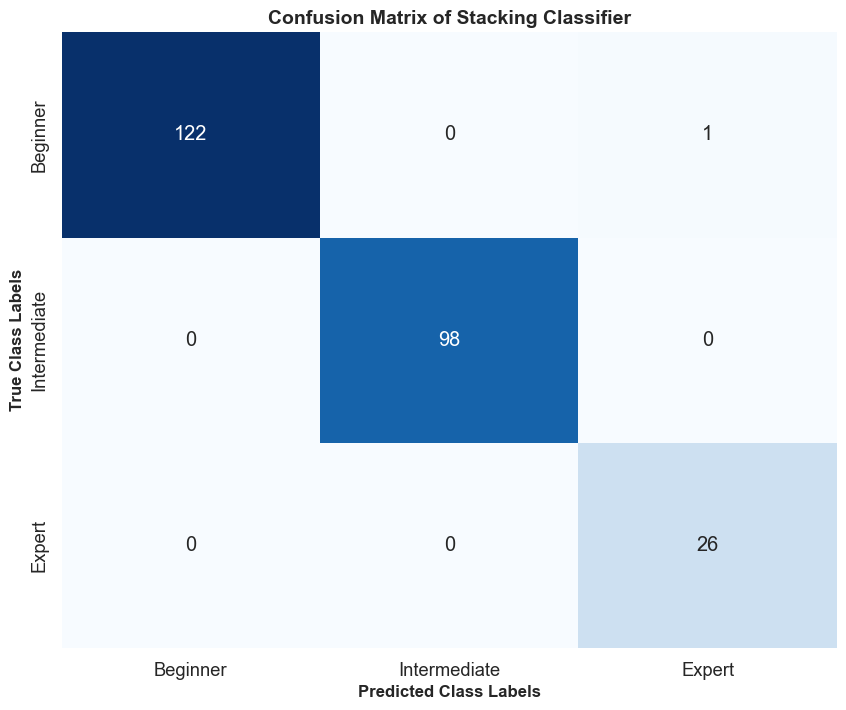

In [85]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Identify categorical columns in X
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['Level'])  # All columns except 'Level'
y = df['Level']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Define the estimators for the stacking classifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=42)),
    ('svr', LinearSVC(random_state=42))
]

# Create the stacking classifier
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=GaussianNB()
)

# Train the stacking classifier
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
clf_accuracy = accuracy_score(y_pred, y_test)
clf_report = classification_report(y_pred, y_test)
clf_matrix = confusion_matrix(y_pred, y_test)

# Print evaluation metrics
print('Accuracy of Stacking Classifier : ', round(clf_accuracy, 3))
print('Classification report of Stacking Classifier : \n', clf_report)
print('Confusion Matrix of Stacking Classifier : \n', clf_matrix)

# Plot the confusion matrix as a heatmap with more descriptive axes
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

# You can customize class names based on your dataset
class_names = ['Beginner', 'Intermediate', 'Expert']

sns.heatmap(clf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)

# Provide more descriptive axis labels and title
plt.xlabel("Predicted Class Labels", fontsize=12, fontweight='bold')
plt.ylabel("True Class Labels", fontsize=12, fontweight='bold')
plt.title("Confusion Matrix of Stacking Classifier", fontsize=14, fontweight='bold')
plt.show()


In [86]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the cleaned dataset
file_path = 'Cleaned_Game_Analytics_Dataset.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Identify categorical columns in X
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['Level'])  # All columns except 'Level'
y = df['Level']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Define the estimators for the stacking classifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=42)),
    ('svr', LinearSVC(random_state=42))
]

# Create the stacking classifier
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=GaussianNB()
)

# Train the stacking classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(pred, y_test)

# Output the accuracy
print('Accuracy of Stacking Classifier on Test Data: ', round(accuracy, 3))


Accuracy of Stacking Classifier on Test Data:  0.996


Accuracy of Ensemble Model:  0.996
Confusion Matrix of Ensemble Model:
 [[122   0   1]
 [  0  98   0]
 [  0   0  26]]
Classification Report of Ensemble Model:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       123
           1       1.00      1.00      1.00        98
           2       0.96      1.00      0.98        26

    accuracy                           1.00       247
   macro avg       0.99      1.00      0.99       247
weighted avg       1.00      1.00      1.00       247



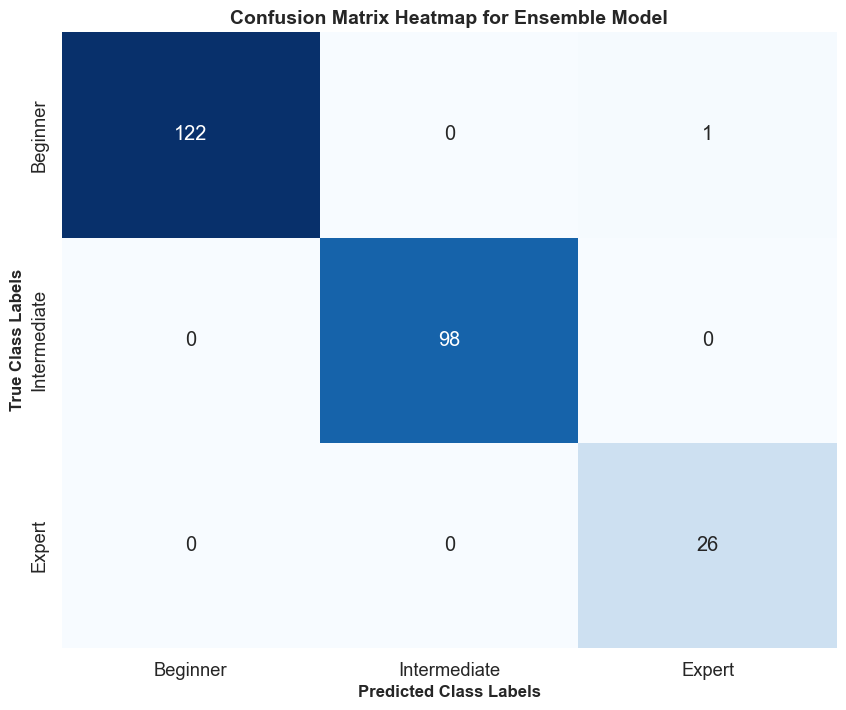

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you already have pred and y_test defined for your Ensemble Model

# Calculate accuracy, confusion matrix, and classification report
eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(pred, y_test)
eb_report = classification_report(pred, y_test)

# Print the results
print('Accuracy of Ensemble Model: ', round(eb_accuracy, 3))
print('Confusion Matrix of Ensemble Model:\n', eb_matrix)
print('Classification Report of Ensemble Model:\n', eb_report)

# Plot the confusion matrix as a heatmap with more descriptive axis labels
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust the font size for better readability

# Customize class labels based on your dataset
class_names = ['Beginner', 'Intermediate', 'Expert']

sns.heatmap(eb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)

# Provide more descriptive axis labels and title
plt.xlabel("Predicted Class Labels", fontsize=12, fontweight='bold')
plt.ylabel("True Class Labels", fontsize=12, fontweight='bold')
plt.title("Confusion Matrix Heatmap for Ensemble Model", fontsize=14, fontweight='bold')
plt.show()


In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming the models are already trained and you have X_test and y_test
# Make predictions with each model

# Random Forest
pred_RF = rf.predict(X_test)

# SVM
pred_SVM = svr.predict(X_test)

# Naive Bayes
pred_NB = nb.predict(X_test)

# Ensemble (Stacking Classifier)
pred_Ensemble = clf.predict(X_test)


# Assuming y_test and pred_RF, pred_SVM, pred_NB, and pred_Ensemble are the predictions from your models

# Random Forest
precision_rf = precision_score(y_test, pred_RF, average='weighted')
recall_rf = recall_score(y_test, pred_RF, average='weighted')
f1_rf = f1_score(y_test, pred_RF, average='weighted')

# SVM
precision_svm = precision_score(y_test, pred_SVM, average='weighted')
recall_svm = recall_score(y_test, pred_SVM, average='weighted')
f1_svm = f1_score(y_test, pred_SVM, average='weighted')

# Naive Bayes
precision_nb = precision_score(y_test, pred_NB, average='weighted')
recall_nb = recall_score(y_test, pred_NB, average='weighted')
f1_nb = f1_score(y_test, pred_NB, average='weighted')

# Ensemble
precision_ensemble = precision_score(y_test, pred_Ensemble, average='weighted')
recall_ensemble = recall_score(y_test, pred_Ensemble, average='weighted')
f1_ensemble = f1_score(y_test, pred_Ensemble, average='weighted')

# Aggregate metrics
precision = [precision_rf, precision_svm, precision_nb, precision_ensemble]
recall = [recall_rf, recall_svm, recall_nb, recall_ensemble]
f1_scores = [f1_rf, f1_svm, f1_nb, f1_ensemble]


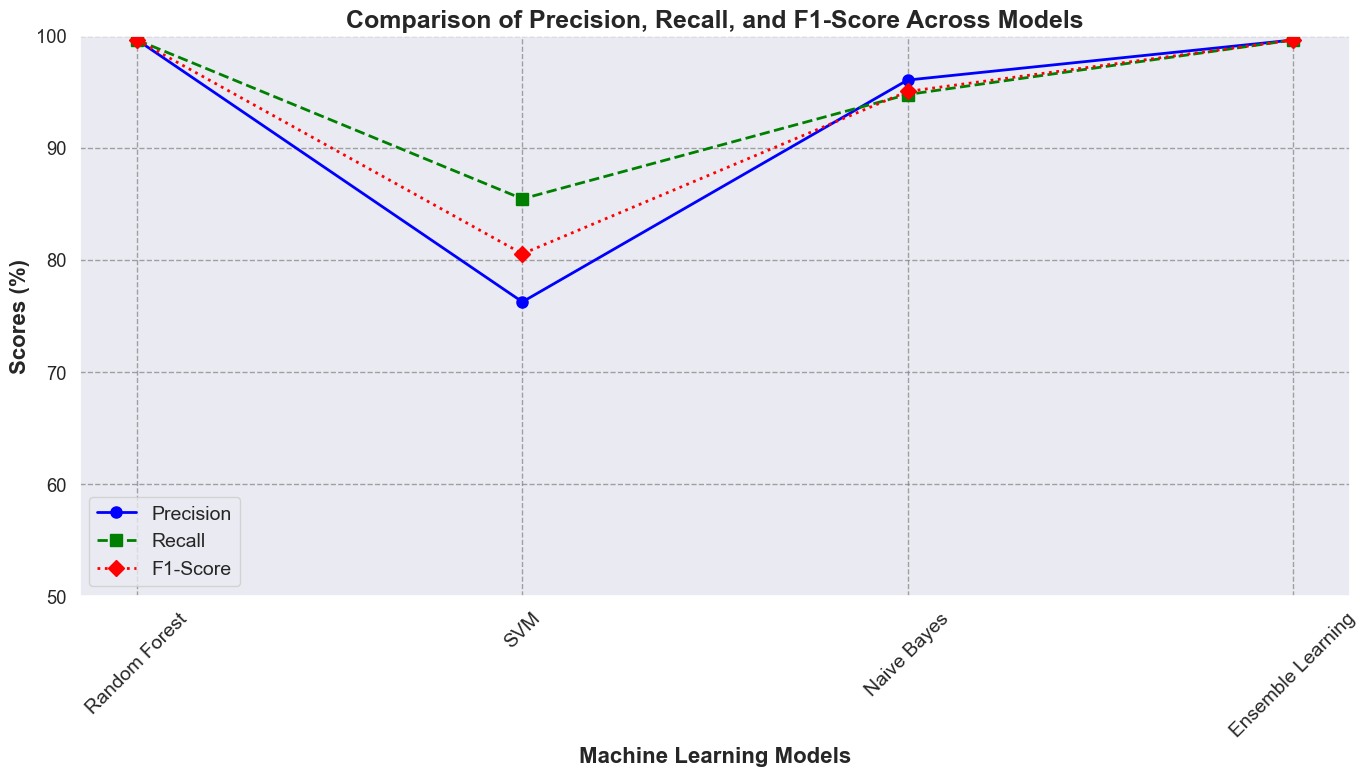

In [89]:
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Learning']

# Convert metrics to percentages if necessary
precision = [p * 100 for p in precision]
recall = [r * 100 for r in recall]
f1_scores = [f * 100 for f in f1_scores]

# X-axis values (models)
x = range(len(models))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot precision scores with markers and line style for better readability
ax.plot(x, precision, marker='o', markersize=8, linestyle='-', linewidth=2, color='blue', label='Precision')

# Plot recall scores with markers and line style for better readability
ax.plot(x, recall, marker='s', markersize=8, linestyle='--', linewidth=2, color='green', label='Recall')

# Plot F1-score scores with markers and line style for better readability
ax.plot(x, f1_scores, marker='D', markersize=8, linestyle=':', linewidth=2, color='red', label='F1-Score')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, fontsize=14)
ax.set_xlabel('Machine Learning Models', fontsize=16, fontweight='bold')

# Set y-axis label
ax.set_ylabel('Scores (%)', fontsize=16, fontweight='bold')

# Set plot title with increased font size and weight
ax.set_title('Comparison of Precision, Recall, and F1-Score Across Models', fontsize=18, fontweight='bold')

# Add a legend with larger font size
ax.legend(fontsize=14)

# Add grid for better readability with a lighter color and style
ax.grid(True, linestyle='--', alpha=0.7, color='gray')

# Set y-axis range to zoom in on the graph, e.g., 50 to 100
ax.set_ylim(50, 100)

# Improve layout to avoid clipping of tick labels and title
plt.tight_layout()

# Show the plot
plt.show()


KEY INSIGHTS

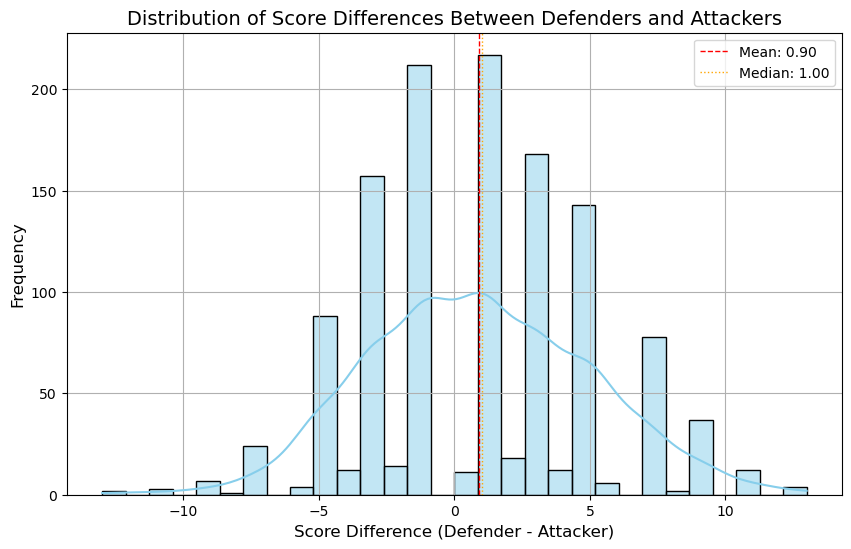

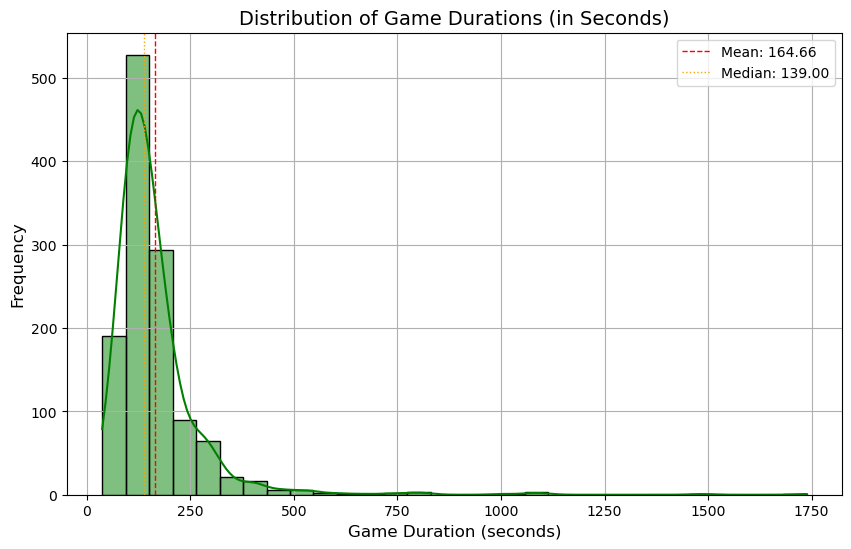


Score Difference Stats:
----------------------
count    1232.000000
mean        0.904221
std         4.088451
min       -13.000000
25%        -2.000000
50%         1.000000
75%         3.000000
max        13.000000
Name: Score_Difference, dtype: float64


Game Duration Stats:
-------------------
count    1232.000000
mean      164.657468
std       118.512557
min        37.000000
25%       105.000000
50%       139.000000
75%       185.000000
max      1738.000000
Name: Time_in_seconds, dtype: float64


Win Distribution:
----------------
Winner
Defender    56.574675
Attacker    42.532468
Draw         0.892857
Name: proportion, dtype: float64


1. **Game Improvement**:
   - *Balance Attacker and Defender Roles*: The strong negative correlation between defender and attacker scores (-0.99) suggests that one role's success is directly tied to the other's failure. To improve balance, the game could introduce mechanics that reduce score disparities, especially for lower-performing players.
   -

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned data (replace with your actual file path)
df = pd.read_csv('Cleaned_Game_Analytics_Dataset.csv')

# Generate insights for game improvement and cybersecurity enhancement

# 1. Analyzing score differences between defenders and attackers
df['Score_Difference'] = df['Defender_Score'] - df['Attacker_Score']
score_diff_stats = df['Score_Difference'].describe()

# 2. Analyzing game duration statistics
game_duration_stats = df['Time_in_seconds'].describe()

# 3. Plot: Distribution of score differences
plt.figure(figsize=(10, 6))
sns.histplot(df['Score_Difference'], bins=30, kde=True, color='skyblue')
plt.axvline(df['Score_Difference'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {df["Score_Difference"].mean():.2f}')
plt.axvline(df['Score_Difference'].median(), color='orange', linestyle='dotted', linewidth=1, label=f'Median: {df["Score_Difference"].median():.2f}')
plt.title('Distribution of Score Differences Between Defenders and Attackers', fontsize=14)
plt.xlabel('Score Difference (Defender - Attacker)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 4. Plot: Game duration histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Time_in_seconds'], bins=30, kde=True, color='green')
plt.axvline(df['Time_in_seconds'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {df["Time_in_seconds"].mean():.2f}')
plt.axvline(df['Time_in_seconds'].median(), color='orange', linestyle='dotted', linewidth=1, label=f'Median: {df["Time_in_seconds"].median():.2f}')
plt.title('Distribution of Game Durations (in Seconds)', fontsize=14)
plt.xlabel('Game Duration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 5. Analyzing win distribution between defenders and attackers
win_distribution = df['Winner'].value_counts(normalize=True) * 100

# Output Insights
output = {
    "Score Difference Stats": score_diff_stats,
    "Game Duration Stats": game_duration_stats,
    "Win Distribution": win_distribution
}

# Display the key stats in a clean format
for key, value in output.items():
    print(f"\n{key}:\n{'-'*len(key)}\n{value}\n")




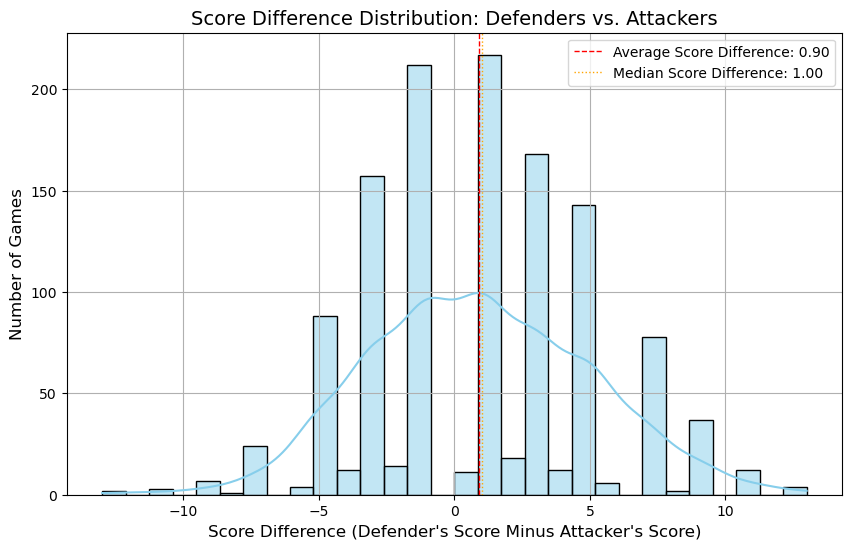

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned data (replace with your actual file path)
df = pd.read_csv('Cleaned_Game_Analytics_Dataset.csv')

# Analyzing score differences between defenders and attackers
df['Score_Difference'] = df['Defender_Score'] - df['Attacker_Score']

# Plot: Distribution of score differences
plt.figure(figsize=(10, 6))
sns.histplot(df['Score_Difference'], bins=30, kde=True, color='skyblue')
plt.axvline(df['Score_Difference'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Average Score Difference: {df["Score_Difference"].mean():.2f}')
plt.axvline(df['Score_Difference'].median(), color='orange', linestyle='dotted', linewidth=1, label=f'Median Score Difference: {df["Score_Difference"].median():.2f}')
plt.title('Score Difference Distribution: Defenders vs. Attackers', fontsize=14)
plt.xlabel("Score Difference (Defender's Score Minus Attacker's Score)", fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:02<00:00, 12.79it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 985, number of used features: 3
[LightGBM] [Info] Start training from score -0.833518
[LightGBM] [Info] Start training from score -0.584543
[LightGBM] [Info] Start training from score -4.813200
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

100%|██████████| 29/29 [00:03<00:00,  8.05it/s]


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 1.00               1.00    None      1.00   
ExtraTreeClassifier                1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
LGBMClassifier                     1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
BernoulliNB                        1.00               1.00    None      1.00   
GaussianNB                         1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
LinearDiscriminantAnalysis         0.97 

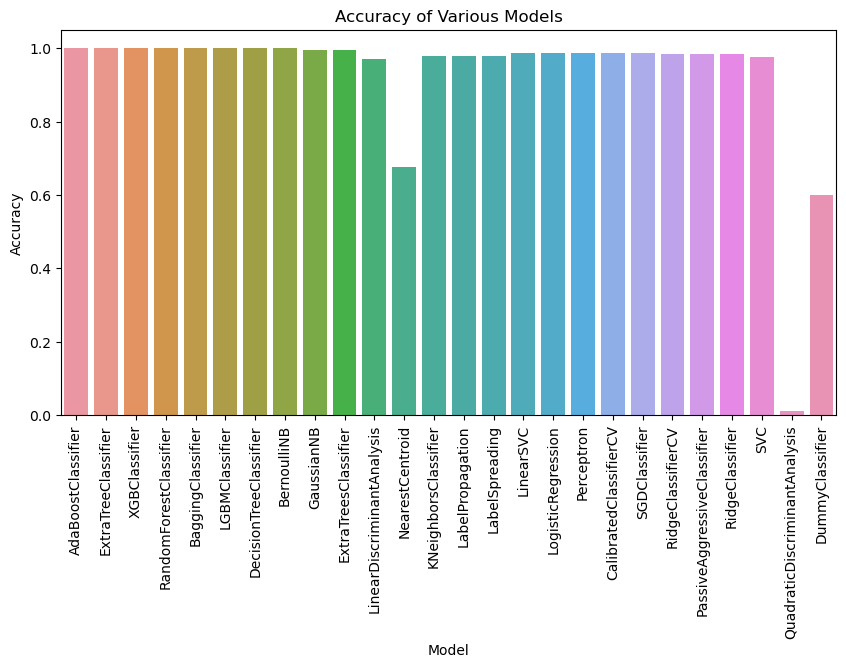

In [10]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned data (replace 'Cleaned_Game_Analytics_Dataset.csv' with your actual file path)
df = pd.read_csv('Cleaned_Game_Analytics_Dataset.csv')

# Preprocessing
# If 'Winner' is categorical, encode it into numeric values
le = LabelEncoder()
df['Winner'] = le.fit_transform(df['Winner'])  # Assuming 'Defender' = 1 and 'Attacker' = 0

# Define X (features) and y (target)
X = df[['Defender_Score', 'Attacker_Score', 'Time_in_seconds']]  # Features
y = df['Winner']  # Target variable (encoded)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit LazyClassifier on the data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results of model comparison
print(models)

# Plot the accuracy of models
plt.figure(figsize=(10, 5))
sns.barplot(x=models.index, y='Accuracy', data=models)
plt.xticks(rotation=90)
plt.title("Accuracy of Various Models")
plt.show()

# If you want to save the model comparison to a CSV for further analysis
models.to_csv('model_comparison_results.csv', index=False)


 97%|█████████▋| 28/29 [00:02<00:00, 14.90it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 985, number of used features: 3
[LightGBM] [Info] Start training from score -0.833518
[LightGBM] [Info] Start training from score -0.584543
[LightGBM] [Info] Start training from score -4.813200
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

100%|██████████| 29/29 [00:02<00:00, 12.43it/s]


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 1.00               1.00    None      1.00   
ExtraTreeClassifier                1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
LGBMClassifier                     1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
BernoulliNB                        1.00               1.00    None      1.00   
GaussianNB                         1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
LinearDiscriminantAnalysis         0.97 

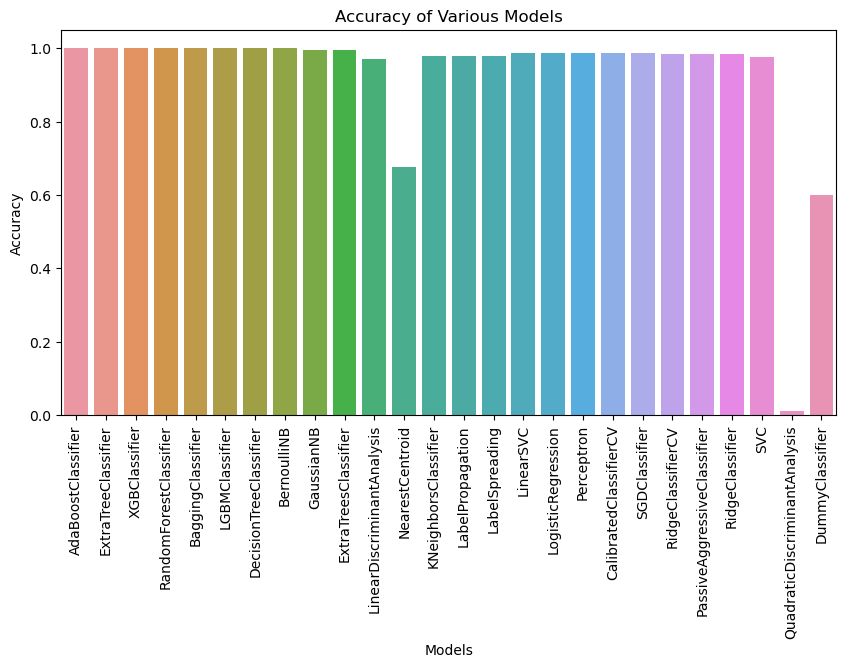

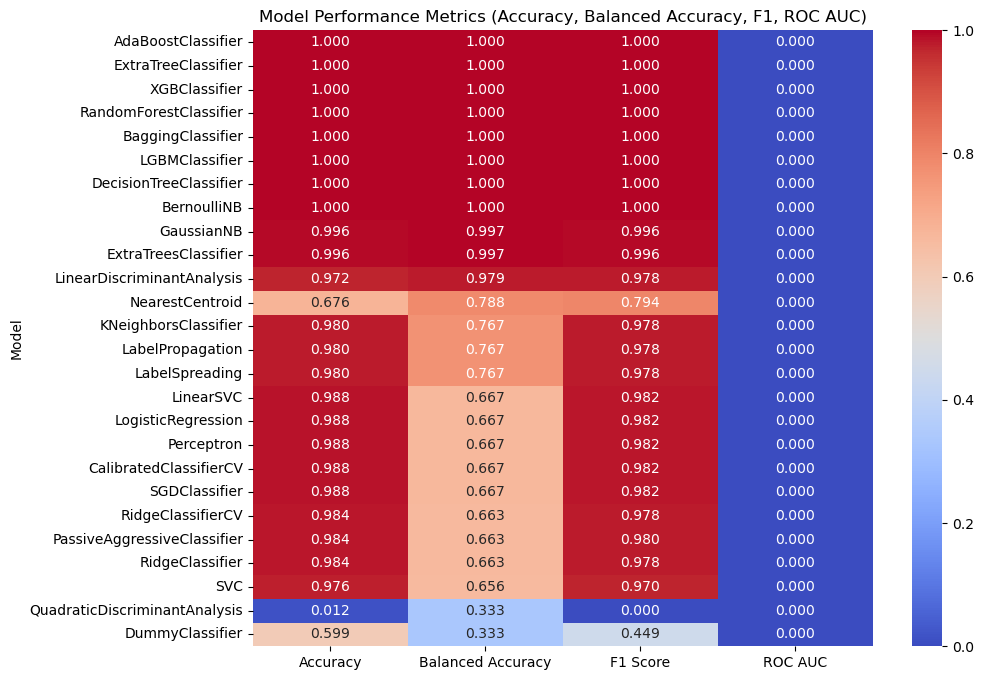

In [14]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned data (replace 'Cleaned_Game_Analytics_Dataset.csv' with your actual file path)
df = pd.read_csv('Cleaned_Game_Analytics_Dataset.csv')

# Preprocessing
# If 'Winner' is categorical, encode it into numeric values
le = LabelEncoder()
df['Winner'] = le.fit_transform(df['Winner'])  # Assuming 'Defender' = 1 and 'Attacker' = 0

# Define X (features) and y (target)
X = df[['Defender_Score', 'Attacker_Score', 'Time_in_seconds']]  # Features
y = df['Winner']  # Target variable (encoded)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit LazyClassifier on the data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results of model comparison
print(models)

# Ensure metrics are numeric and handle missing data
metrics_to_display = models[['Accuracy', 'Balanced Accuracy', 'F1 Score', 'ROC AUC']].apply(pd.to_numeric, errors='coerce')

# Check if there are any NaN values
print("Missing values in metrics to display:\n", metrics_to_display.isnull().sum())

# Fill NaN values with a placeholder (e.g., 0.0) to ensure the heatmap can be plotted
metrics_to_display.fillna(0.0, inplace=True)

# 1. Plot: Accuracy of models (Bar plot)
plt.figure(figsize=(10, 5))
sns.barplot(x=models.index, y='Accuracy', data=models)
plt.xticks(rotation=90)
plt.title("Accuracy of Various Models")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# 2. Plot: Heatmap of different metrics
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metrics_to_display, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Model Performance Metrics (Accuracy, Balanced Accuracy, F1, ROC AUC)')
plt.show()

# If you want to save the model comparison to a CSV for further analysis
models.to_csv('model_comparison_results.csv', index=False)
